In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Import données

In [2]:
data2015 = pd.read_csv('Data/2015-building-energy-benchmarking.csv', sep = ',')
data2016 = pd.read_csv('Data/2016-building-energy-benchmarking.csv', sep = ',')

# Description du jeu de données

In [3]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
#changer la vue max pour voir toutes les colonnes du dataframe

pd.set_option('display.max_columns', 100)
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [6]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
data2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [8]:
data2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# Nettoyage

In [9]:
#tout mettre ne minuscule

def lowercase(df):
    df = df.applymap(lambda x: x.lower() if type(x)==str else x) #contenu
    df.columns = df.columns.str.lower() #intitulé colonnes
    
    return df

In [10]:
data2015 = lowercase(data2015)
data2016 = lowercase(data2016)

## Recherche doublons dans les datasets d'origine

In [11]:
data2015[data2015.duplicated(subset = 'osebuildingid')]

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,location,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes


In [12]:
data2016[data2016.duplicated(subset = 'osebuildingid')]

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,address,city,state,zipcode,taxparcelidentificationnumber,councildistrictcode,neighborhood,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),defaultdata,comments,compliancestatus,outlier,totalghgemissions,ghgemissionsintensity


Il n'y a pas de doublon présent dans les jeux de données. Chaque batiment a bien une seule entrée dans chaque dataset.

## Recherche des colonnes différentes

Il y a beaucoup de colonnes avec des noms/structures différents mais qui donnent la même information en fonction du dataframe. On va les identifier et les traiter afin d'avoir les mêmes colonnes dans les deux Dataframes

In [13]:
def diff_colonnes(df1, df2):

    print('Colonnes non présentes dans le dataframe 2016 : \n')

    for i in df1.columns:
        if i not in df2.columns:
            print (i)

    print('\nColonnes non présentes dans le dataframe 2015 : \n')

    for j in df2.columns:
        if j not in df1.columns:
            print(j)

In [14]:
diff_colonnes(data2015, data2016)

Colonnes non présentes dans le dataframe 2016 : 

location
otherfueluse(kbtu)
ghgemissions(metrictonsco2e)
ghgemissionsintensity(kgco2e/ft2)
comment
2010 census tracts
seattle police department micro community policing plan areas
city council districts
spd beats
zip codes

Colonnes non présentes dans le dataframe 2015 : 

address
city
state
zipcode
latitude
longitude
comments
totalghgemissions
ghgemissionsintensity


## Building Types

In [15]:
print(data2015.buildingtype.unique())
print(data2016.buildingtype.unique())

['nonresidential' 'nonresidential cos' 'multifamily mr (5-9)'
 'sps-district k-12' 'multifamily lr (1-4)' 'campus'
 'multifamily hr (10+)']
['nonresidential' 'nonresidential cos' 'multifamily mr (5-9)'
 'sps-district k-12' 'campus' 'multifamily lr (1-4)'
 'multifamily hr (10+)' 'nonresidential wa']


Le projet concerne uniquement les bâtiments non destinés à l'habitation on va donc réduire le jeu de données à ces bâtiments. On va donc enlever ces derniers lorsqu'ils sont de type multifamily.

In [16]:
data2015 = data2015[~data2015.buildingtype.str.contains('multifamily')]
data2016 = data2016[~data2016.buildingtype.str.contains('multifamily')]

In [17]:
print(data2015.shape[0], 'lignes restantes pour data2015')
print(data2016.shape[0], 'lignes restantes pour data2016')

1650 lignes restantes pour data2015
1668 lignes restantes pour data2016


## location vs address/city/state/zipcode/latitude/longitude

In [18]:
data2015.location[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 olive way", "city": "seattle", "state": "wa", "zip": "98101"}\'}'

La colonnes location du jeu de données de 2015 contient les information latitude, longitude, et adresse sous forme de dictionnaire que l'on va traiter pour extraire ces informations sous forme de colonnes et correspondre au format du jeu de données de 2016.

In [19]:
#https://www.geeksforgeeks.org/python-convert-string-dictionary-to-dictionary/

def transform_dict_colonnes(df, colonne):
    df[colonne] = df[colonne].apply(ast.literal_eval) #transformer le string en dic
    df = df.join(df[colonne].apply(pd.Series)).drop(colonne, axis = 1) #transformer le dic en nouvelles colonnes et supprimer colonne d'origine
    
    return df

In [20]:
data2015 = transform_dict_colonnes(data2015, 'location')
data2015 = transform_dict_colonnes(data2015, 'human_address')

In [21]:
data2015.rename(columns = {'zip' : 'zipcode'}, inplace = True)

In [22]:
data2015.head()

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes,latitude,longitude,address,city,state,zipcode
0,1,2015,nonresidential,hotel,mayflower park hotel,659000030,7,downtown,1927,1,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 olive way,seattle,wa,98101
1,2,2015,nonresidential,hotel,paramount hotel,659000220,7,downtown,1996,1,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 pine st,seattle,wa,98101
2,3,2015,nonresidential,hotel,westin hotel,659000475,7,downtown,1969,1,41.0,961990,0,961990,"hotel, parking, swimming pool",hotel,757243.0,parking,100000.0,swimming pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,yes,NaN,compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5th ave,seattle,wa,98101
3,5,2015,nonresidential,hotel,hotel max,659000640,7,downtown,1926,1,10.0,61320,0,61320,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,no,NaN,compliant,high outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 stewart st,seattle,wa,98101
4,8,2015,nonresidential,hotel,warwick seattle hotel,659000970,7,downtown,1980,1,18.0,119890,12460,107430,"hotel, parking, swimming pool",hotel,123445.0,parking,68009.0,swimming pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,no,NaN,compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 lenora st,seattle,wa,98121


## Ghgemissions

Nous allons vérifier les ordres de grandeur pour savoir si à priori on a la même unité. Si c'est le cas on rename les colonnes pour qu'elles soient identiques.

In [23]:
data2015[['ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)']].describe()

,ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2)
count,1643.000000,1643.000000
mean,168.993183,1.349793
std,566.803048,2.076396
min,0.000000,0.000000
25%,19.275000,0.170000
50%,48.600000,0.660000
75%,138.055000,1.610000
max,11824.890000,31.380000


In [24]:
data2016[['totalghgemissions', 'ghgemissionsintensity']].describe()

,totalghgemissions,ghgemissionsintensity
count,1666.000000,1666.000000
mean,184.973301,1.607845
std,751.976001,2.336882
min,-0.800000,-0.020000
25%,19.967500,0.350000
50%,49.580000,0.880000
75%,142.382500,1.890000
max,16870.980000,34.090000


In [25]:
#meme ordre de grandeur donc à priori même unité, rename pour cohésion
data2016.rename(columns = {'totalghgemissions' : 'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity' : 'ghgemissionsintensity(kgco2e/ft2)'}, inplace = True)

## colonnes redondantes (gas therms/kbtu et electricity kWh/kbtu)

LE reste du jeu de données est en kbtu, on va conserver en priorité cette unité. Nous allons vérifier que les données des deux colonnes donnent bien les mêmes informations.  
1kWh = 3412.14 kbtu  
1therm = 99976.1 kbtu

In [26]:
dictdf = {'data2015':data2015, 'data2016':data2016}
colkbtu = ['electricity(kbtu)', 'naturalgas(kbtu)']
colautreunité = ['electricity(kwh)', 'naturalgas(therms)']
unité = ['kWh','therm']

def ecart_conversion(df, colonne1, colonne2, unitecolonne1):
    
    data = dictdf[df]
    
    if unitecolonne1 == 'kWh': #choix du facteur de convesrion
        facteur = 3.41214
    else:
        facteur = 99.9761
        
    data['ecart'] = data.apply(lambda x: abs(x[colonne2]-x[colonne1]*facteur), axis = 1)
                           
    x = data.ecart.describe()
    y = data[data.ecart>data.ecart.quantile(0.75)][colonne2].describe()

    data.drop('ecart', axis = 1, inplace = True)
    
    print('Apperçu des erreurs entre', colonne1, 'et', colonne2, 'pour le jeu de données ', df, '\n')
    print(x)
    print('\nAppercu des valeurs de', colonne2, 'pour le 3eme quartile d\'erreur pour le jeu de données', df, '\n')
    print(y, '\n')

In [27]:
for dataf in dictdf:
    for i,j,unit in zip(colkbtu, colautreunité, unité):
        print()
        ecart_conversion(dataf,j,i,unit)


Apperçu des erreurs entre electricity(kwh) et electricity(kbtu) pour le jeu de données  data2015 

count    1643.000000
mean        2.866396
std         6.216066
min         0.000000
25%         0.611360
50%         1.324820
75%         2.573400
max       135.917280
Name: ecart, dtype: float64

Appercu des valeurs de electricity(kbtu) pour le 3eme quartile d'erreur pour le jeu de données data2015 

count    4.110000e+02
mean     1.714982e+07
std      2.235593e+07
min      1.751478e+06
25%      6.625172e+06
50%      1.008279e+07
75%      1.893832e+07
max      2.847263e+08
Name: electricity(kbtu), dtype: float64 


Apperçu des erreurs entre naturalgas(therms) et naturalgas(kbtu) pour le jeu de données  data2015 

count     1643.000000
mean       426.475663
std       1446.937331
min          0.000000
25%          0.000000
50%        107.509200
75%        345.051050
max      32649.167600
Name: ecart, dtype: float64

Appercu des valeurs de naturalgas(kbtu) pour le 3eme quartile d'erreur po

Les écarts sont très faibles comparés à l'ordre de grandeur des valeurs en jeu, on a bien des données équivalentes, on peut donc drop les colonnes qui ne sont pas en kbtu en vérifiant toutefois qu'il y a bien toujours une valeur en kbtu. Il y a le même nombre de valeurs manquantes dans les colonnes correspondantes entre elles pour chaque dataframe, il suffit donc de regarder si pour chaque valeur en kbtu 'vide' il en existe une dans l'autre unité.

In [28]:
for df in dictdf:
    data = dictdf[df]
    for i,j in zip(colkbtu,colautreunité):
        n = data[data[i].isna() & data[j].notna()].shape[0]
        print('Il y a', n, 'valeurs à convertir de', j, 'à', i, 'pour le jeu de données', df)

Il y a 0 valeurs à convertir de electricity(kwh) à electricity(kbtu) pour le jeu de données data2015
Il y a 0 valeurs à convertir de naturalgas(therms) à naturalgas(kbtu) pour le jeu de données data2015
Il y a 0 valeurs à convertir de electricity(kwh) à electricity(kbtu) pour le jeu de données data2016
Il y a 0 valeurs à convertir de naturalgas(therms) à naturalgas(kbtu) pour le jeu de données data2016


Il n'y en a aucune, on peut donc supprimer les colonnes qui ne sont pas en kbtu.

In [29]:
data2015.drop(['electricity(kwh)','naturalgas(therms)'], axis = 1, inplace = True)
data2016.drop(['electricity(kwh)','naturalgas(therms)'], axis = 1, inplace = True)

## Comments/Comment

In [30]:
data2015.comment.unique()

array([nan,
       'under construction starting 6/2013 (old building demolished) and ending 9/2016. new building re-opened 9/2016. year built changed from 1948 to 2016.',
       "part of mckinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. learn more at www.mckinstry.com.",
       "one of two office buildings on mckinstry's campus partially remodeled in 2009 from warehouse to office space. served by rooftop air handling units with underfloor vavs.  self-performed energy efficiency upgrades in 2015 include a long-term led lighting re",
       'part of mckinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. served by rooftop package units for heating and cooling. upgrades inclu',
       'construction completed in mid 2015. the building was unoccupied for most of 2015.',
 

Il y a des bâtiments qui etaient en construction pour la majeure partie de 2015/2016, les données de consommation/ ghgemission ne seront pas représentatives. Nous les enlevons donc du jeu de données.

In [31]:
data2015[(data2015.comment.str.contains('construction')) & data2015.comment.notna()]

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes,latitude,longitude,address,city,state,zipcode
62,87,2015,sps-district k-12,k-12 school,arbor heights elementary school (sps-district),2518400005,1,southwest,1948,1,2.0,53352,0,53352,k-12 school,k-12 school,53352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,under construction starting 6/2013 (old buildi...,compliant,low outlier,NaN,54.0,NaN,51.0,17920,47.50935392,-122.3782222,3701 sw 104th st,seattle,wa,98146
719,19694,2015,sps-district k-12,k-12 school,mann (sps-district),519000290,3,central,1925,1,2.0,37327,0,37327,k-12 school,k-12 school,41191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,construction completed in mid 2015. the buildi...,compliant,NaN,NaN,9.0,NaN,17.0,19578,47.60818545,-122.30052066,2410 e cherry st,seattle,wa,98122
1358,21570,2015,sps-district k-12,k-12 school,pinehurst elementary (sps-district),2044500390,5,north,1950,1,1.0,34005,0,34005,k-12 school,k-12 school,34005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,under construction starting 6/2013 (old buildi...,compliant,NaN,NaN,46.0,NaN,26.0,19579,47.71334315,-122.3145902,11530 12th ave ne,seattle,wa,98125
1360,21578,2015,sps-district k-12,k-12 school,genesee school (sps-district),2095200005,1,southwest,1949,1,1.0,41221,0,41221,k-12 school,k-12 school,41221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,under construction starting 6/2013 (old buildi...,compliant,low outlier,NaN,1.0,NaN,50.0,18795,47.56546417,-122.3968811,5012 sw genesee st,seattle,wa,98116
1373,21616,2015,sps-district k-12,k-12 school,olympic hills (sps-district),2126049041,5,north,1954,1,1.0,42292,0,42292,k-12 school,k-12 school,43188.0,NaN,NaN,NaN,NaN,NaN,72.0,52.2,68.7,95.6,117.8,2255905.0,2965189.0,0.0,841540.0,1414400.0,0.0,80.99,1.83,yes,under construction starting 6/2015 (old buildi...,compliant,NaN,117.0,29.0,2.0,26.0,19579,47.72466237,-122.30694,13018 20th ave ne,seattle,wa,98125
2108,24408,2015,sps-district k-12,k-12 school,wilson-pacific (sps-district),3126049064,5,northwest,1953,1,1.0,110830,0,110830,k-12 school,k-12 school,110830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,under construction starting 09/2014 (old build...,compliant,NaN,NaN,46.0,NaN,34.0,18377,47.69548916,-122.3401878,1330 n 90th st,seattle,wa,98103
2381,25361,2015,sps-district k-12,k-12 school,decatur elementary (sps-district),6392002430,4,northeast,1961,1,1.0,43578,0,43578,k-12 school,k-12 school,45370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,property now has two buildings: thornton creek...,compliant,NaN,NaN,55.0,NaN,48.0,18792,47.68558967,-122.2825904,7711 43rd ave ne,seattle,wa,98115


In [32]:
buildid = data2015[(data2015.comment.str.contains('construction')) & data2015.comment.notna()].osebuildingid.values

buildid

array([   87, 19694, 21570, 21578, 21616, 24408, 25361], dtype=int64)

In [33]:
#19694 à supprimer uniquement de 2015 car construction finie en 2015

data2015 = data2015[~data2015.osebuildingid.isin(buildid)].copy()

buildid = np.delete(buildid, 1) #on enleve 19694 de la liste

data2016 = data2016[~data2016.osebuildingid.isin(buildid)].copy()

In [34]:
data2016.rename(columns={'comments' : 'comment'}, inplace = True)

## point sur différence de colonnes

In [35]:
diff_colonnes(data2015, data2016)

Colonnes non présentes dans le dataframe 2016 : 

otherfueluse(kbtu)
2010 census tracts
seattle police department micro community policing plan areas
city council districts
spd beats
zip codes

Colonnes non présentes dans le dataframe 2015 : 



### Other fuel use

In [36]:
data2015['otherfueluse(kbtu)'].value_counts()

0.0          1627
12551.0         1
427938.0        1
2304567.0       1
8269669.0       1
1943011.0       1
547.0           1
15527.0         1
6464408.0       1
182715.0        1
337952.0        1
229942.0        1
177849.0        1
145944.0        1
5596.0          1
2944419.0       1
Name: otherfueluse(kbtu), dtype: int64

Il y a très peu de batiments qui ont une utilisation en fuel autre, on va néanmoins garder cette information.

### 2010 Census tracts

In [37]:
data2015['2010 census tracts'].value_counts()

123.0    33
117.0    10
134.0     8
122.0     7
135.0     6
131.0     6
127.0     6
119.0     4
116.0     3
124.0     2
118.0     1
129.0     1
Name: 2010 census tracts, dtype: int64

### Seattle police department micro community policing plan areas

In [38]:
data2015['seattle police department micro community policing plan areas'].value_counts()

14.0    172
56.0    134
57.0    131
50.0    124
22.0    106
       ... 
18.0      2
16.0      2
10.0      2
47.0      1
39.0      1
Name: seattle police department micro community policing plan areas, Length: 61, dtype: int64

### City council districts

In [39]:
data2015['city council districts'].value_counts()

1.0    58
2.0    22
Name: city council districts, dtype: int64

### Spd beats

In [40]:
data2015['spd beats'].value_counts()

36.0    115
10.0     76
35.0     72
19.0     71
40.0     70
20.0     63
7.0      57
37.0     56
48.0     52
24.0     50
9.0      48
12.0     47
22.0     47
39.0     44
2.0      43
31.0     39
33.0     38
38.0     37
11.0     37
30.0     36
27.0     33
1.0      33
28.0     33
15.0     33
3.0      30
49.0     24
47.0     24
13.0     21
16.0     19
17.0     19
44.0     19
29.0     18
34.0     18
18.0     17
6.0      17
50.0     17
43.0     16
41.0     15
23.0     14
42.0     14
8.0      13
25.0     13
4.0      13
26.0     12
45.0     10
51.0     10
32.0      9
21.0      9
14.0      9
46.0      7
5.0       5
Name: spd beats, dtype: int64

### Zip codes

In [41]:
data2015['zip codes'].value_counts()

19584    178
18379    169
18081    155
18390    144
18388    126
19578     89
18383     86
19576     77
19575     68
18377     68
19582     53
18386     53
19579     51
18800     50
18792     50
17919     44
18385     37
18376     27
18789     22
19581     22
18795     22
18235     21
18798     19
17916      4
18229      3
18230      2
17926      1
17923      1
17920      1
Name: zip codes, dtype: int64

Les dernières colonnes abordées sont d'autre 'répartitions' en zone d ela ville de Seattle que l'on ne conservera pas par la suite.

## Surfaces

### Surfaces négatives

Il y a des surfaces négatives dans le jeu de données de 2015.

In [42]:
data2015[['propertygfaparking', 'propertygfabuilding(s)']].describe()

,propertygfaparking,propertygfabuilding(s)
count,1643.000000,1.643000e+03
mean,13771.476567,9.894400e+04
std,44989.381564,1.692304e+05
min,-2.000000,-5.055000e+04
25%,0.000000,2.851550e+04
50%,0.000000,4.741500e+04
75%,0.000000,9.420100e+04
max,512608.000000,2.200000e+06


In [43]:
index = []
for colonne in ['propertygfaparking', 'propertygfabuilding(s)']:
    for ind in data2015[data2015[colonne] <0].index.values:
        index.append(ind) #récupération de l'index des valeurs négatives

In [44]:
data2015.drop(index, inplace = True)

### Cohérence des surfaces

In [45]:
data2015.columns

Index(['osebuildingid', 'datayear', 'buildingtype', 'primarypropertytype',
       'propertyname', 'taxparcelidentificationnumber', 'councildistrictcode',
       'neighborhood', 'yearbuilt', 'numberofbuildings', 'numberoffloors',
       'propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)',
       'listofallpropertyusetypes', 'largestpropertyusetype',
       'largestpropertyusetypegfa', 'secondlargestpropertyusetype',
       'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetype',
       'thirdlargestpropertyusetypegfa', 'yearsenergystarcertified',
       'energystarscore', 'siteeui(kbtu/sf)', 'siteeuiwn(kbtu/sf)',
       'sourceeui(kbtu/sf)', 'sourceeuiwn(kbtu/sf)', 'siteenergyuse(kbtu)',
       'siteenergyusewn(kbtu)', 'steamuse(kbtu)', 'electricity(kbtu)',
       'naturalgas(kbtu)', 'otherfueluse(kbtu)',
       'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)',
       'defaultdata', 'comment', 'compliancestatus', 'outlier',
       '2010 census 

In [46]:
colonnes_surface = ['propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)', 'largestpropertyusetype', 'largestpropertyusetypegfa', 'secondlargestpropertyusetype',
                    'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetype', 'thirdlargestpropertyusetypegfa']

In [47]:
def coherence_surface(df):
       
    dffill = df.fillna(0)
        
    ecart_somme = dffill[dffill.propertygfatotal != (dffill.propertygfaparking + dffill['propertygfabuilding(s)'])] #recuper là ou le total n'est pas egal à la somme batiment+parking
    index_ecart_somme = ecart_somme.index.values.tolist() #recupérer les index
    
    types = ['largestpropertyusetype', 'secondlargestpropertyusetype', 'thirdlargestpropertyusetype']
    valeurs = ['largestpropertyusetypegfa', 'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetypegfa']
    
    index_ecart_parking = []
    
    for i,j in zip(types,valeurs): #regarder si il y a parking dans les colonnes de types et vérifier la valeur par rapport à celle de parking
        
        ecart_parking = dffill[(dffill[i].str.contains('parking')) & (dffill.propertygfaparking != dffill[j])]
        index_ecart_parking += ecart_parking.index.values.tolist()
    
    ecart_total_type = dffill[(dffill.propertygfatotal*1.05) < (dffill.largestpropertyusetypegfa + dffill.secondlargestpropertyusetypegfa + dffill.thirdlargestpropertyusetypegfa)] #enlever quand la somme des 3 principaux >toal+10%
    index_ecart_total_type = ecart_total_type.index.values.tolist()
        
    index_total = list(set(index_ecart_somme+index_ecart_parking+index_ecart_total_type)) #ensemble des index sans doublons potentiels (set)
    
    print (len(index_total), 'lignes sont supprimées du dataframe.')
    
    df.drop(index_total, inplace = True)
    
    pass

In [48]:
coherence_surface(data2015)
coherence_surface(data2016)

388 lignes sont supprimées du dataframe.
424 lignes sont supprimées du dataframe.


In [49]:
print(data2015.shape[0], 'lignes restantes pour data2015')
print(data2016.shape[0], 'lignes restantes pour data2016')

1252 lignes restantes pour data2015
1239 lignes restantes pour data2016


On aurait pu imputer des valeures sur les surfaces afin d'éviter de supprimer autant de batiments du jeu de données, mais ne sachant pas ou se trouve l'erreur en particulier celà pourrait entrainer un biais non négligeable.
Nosu prenons le risque de perdre les informations des batiments supprimés.

## Mise en commun des datasets

In [50]:
data = pd.concat([data2015, data2016]).sort_values(['osebuildingid', 'datayear'])
data.reset_index(drop = True, inplace = True)
#on fusionne les deux dataset en mettant tout dans un seul.

In [51]:
def index_difference_annee(colonne):

    index = []

    for buildingid in data.osebuildingid.unique():
        

        df = data[data.osebuildingid == buildingid] #récupérer les lignes pour chaque identifiant en double
        
        if df.shape[0]==2:

            if df[colonne].values[0] != df[colonne].values[1]: #si les valeurs sont différentes

                index += [df.index[0], df.index[1]] #récupérer les index
            
    return index

In [52]:
def remplacer_valeur(dataframe, colonne, mauvaise_valeur, nouvelle_valeur):
    
    for buildingid in dataframe.osebuildingid.unique():

        df = dataframe[dataframe.osebuildingid == buildingid] #se limiter aux valeurs avec le meme id
        
        if df.shape[0] == 2:

            if df[colonne].values[0] != df[colonne].values[1]: #si les valeurs sont differentes

                for i,j in zip([0,1],[1,0]): 

                    if df[colonne].values[i] == mauvaise_valeur: #si l'une d'elle est une mauvaise valeur

                        dataframe.at[df.index[i], colonne] = df[colonne].values[j] #remplacer la mauvaise valeur par l'autre

            elif df[colonne].values[0] == mauvaise_valeur: #sinon si ce sont les meme valeurs vérifier si elles sont mauvaises

                dataframe.at[df.index[0], colonne] = nouvelle_valeur #et remplacer par la nouvelle fixée
                dataframe.at[df.index[1], colonne] = nouvelle_valeur
                
        elif df[colonne].values[0] == mauvaise_valeur:
            
            dataframe.at[df.index[0], colonne] = nouvelle_valeur
            
            
    pass

In [53]:
def recup_colonnes(dataset, colonne):
    
    if colonne == 'largestpropertyusetype': #largest type
        
        largest_type = dataset.apply(lambda x: 'parking' if (x['propertygfaparking'] > x['propertygfabuilding(s)']) else x['primarypropertytype'], axis = 1) #rempalcer par parking si c'est le plus grand
        dataset.largestpropertyusetype.fillna(largest_type, inplace = True)
    
    elif colonne == 'largestpropertyusetypegfa': #largest surface
        
        largest_surface = dataset.apply(lambda x: x['propertygfaparking'] if x['largestpropertyusetype'] == 'parking' else x['propertygfabuilding(s)'], axis =1) #pariel poru la surface
        dataset.largestpropertyusetypegfa.fillna(largest_surface, inplace = True) #si pas de valeur appliquer le max

    
    elif colonne == 'listofallpropertyusetypes':
        
        dataset['listusecompletion'] = dataset.largestpropertyusetype
        
        for i in dataset.index:
            
            if ((dataset.secondlargestpropertyusetypegfa[i] != 0) & (dataset.secondlargestpropertyusetypegfa.notna()[i])) :
                
                dataset.at[i,'listusecompletion'] = dataset.at[i,'listusecompletion'] + ', ' + dataset.at[i,'secondlargestpropertyusetype']
                
                if ((dataset.thirdlargestpropertyusetypegfa[i] != 0) & (dataset.thirdlargestpropertyusetypegfa.notna()[i])) :
                    
                    dataset.at[i,'listusecompletion'] = dataset.at[i,'listusecompletion'] + ', ' + dataset.at[i,'thirdlargestpropertyusetype']
        
        dataset.listofallpropertyusetypes.fillna(dataset['listusecompletion'], inplace = True) #remplir la liste des usages en fonction des 3 plus grand usages.
        dataset.drop('listusecompletion', axis = 1, inplace = True)
        
    pass

In [54]:
def remplacer_nan(dataframe, colonnes):

    for buildingid in dataframe.osebuildingid.unique():

        df = dataframe[dataframe.osebuildingid == buildingid] #se limiter aux lignes du buildingid
        
        if df.shape[0] == 2:

            for column in colonnes:

                if df[column].notna().values[0] != df[column].notna().values[1]: #regarder si une seule des deux valeurs est nan

                    if df[column].notna().values[0]: #si c'est la premiere valeur qui est valide

                        dataframe.at[df.index[1], column] = df[column].values[0] #donner la valeur de la premiere à la deuxieme

                    else: #si c'est la deuxieme qui est valide

                        dataframe.at[df.index[0], column] = df[column].values[1] #faire l'inverse
    
    for colonne in colonnes:
        
        recup_colonnes(dataframe, colonne)
        
    pass

In [55]:
columns_to_complete = ['numberofbuildings', 'numberoffloors', 'propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)', 'largestpropertyusetype', 'largestpropertyusetypegfa',
                       'secondlargestpropertyusetype', 'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetype', 'thirdlargestpropertyusetypegfa', 'yearsenergystarcertified',
                       'energystarscore', 'siteeui(kbtu/sf)','siteeuiwn(kbtu/sf)', 'sourceeui(kbtu/sf)', 'sourceeuiwn(kbtu/sf)', 'siteenergyuse(kbtu)', 'siteenergyusewn(kbtu)', 'steamuse(kbtu)',
                       'electricity(kbtu)', 'naturalgas(kbtu)', 'otherfueluse(kbtu)', 'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)', 'defaultdata', 'compliancestatus', 'outlier',
                       '2010 census tracts', 'seattle police department micro community policing plan areas', 'city council districts', 'spd beats', 'zip codes', 'taxparcelidentificationnumber']

In [56]:
remplacer_nan(data, columns_to_complete)

In [57]:
recup_colonnes(data, 'listofallpropertyusetypes')

In [58]:
remplacer_valeur(data, 'numberofbuildings', 0, 1)

In [59]:
remplacer_valeur(data, 'numberoffloors', 0, 1)

In [60]:
colonnes_energy = ['siteeui(kbtu/sf)','siteeuiwn(kbtu/sf)', 'sourceeui(kbtu/sf)', 'sourceeuiwn(kbtu/sf)', 'siteenergyuse(kbtu)', 'siteenergyusewn(kbtu)', 'steamuse(kbtu)',
                       'electricity(kbtu)', 'naturalgas(kbtu)', 'otherfueluse(kbtu)', 'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)']

In [61]:
for col in colonnes_energy:
    remplacer_valeur(data, col, 0, 0) #si sur une année une valeur en energie est a 0 mais pas l'autre on prend l'autre sinon on laisse a zero si les deux le sont

In [62]:
coherence_surface(data)

6 lignes sont supprimées du dataframe.


In [63]:
data.head()

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes,latitude,longitude,address,city,state,zipcode
0,1,2015,nonresidential,hotel,mayflower park hotel,659000030,7,downtown,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,3686160.0,1272388.0,0.0,249.43,2.64,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61219025,-122.33799744,405 olive way,seattle,wa,98101
1,1,2016,nonresidential,hotel,mayflower park hotel,0659000030,7,downtown,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,3946027.0,1276453.0,0.0,249.98,2.83,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.6122,-122.33799,405 olive way,seattle,wa,98101.0
2,2,2015,nonresidential,hotel,paramount hotel,659000220,7,downtown,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8354235.0,8765788.0,0.0,3905411.0,4448985.0,0.0,263.51,2.38,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61310583,-122.33335756,724 pine st,seattle,wa,98101
3,2,2016,nonresidential,hotel,paramount hotel,0659000220,7,downtown,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,3242851.0,5145082.0,0.0,295.86,2.86,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61317,-122.33393,724 pine street,seattle,wa,98101.0
4,3,2016,nonresidential,hotel,5673-the westin seattle,0659000475,7,downtown,1969,1.0,41.0,956110,196718,759392,hotel,hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,49526664.0,1493800.0,NaN,2089.28,2.19,False,NaN,compliant,NaN,NaN,NaN,NaN,NaN,NaN,47.61393,-122.3381,1900 5th avenue,seattle,wa,98101.0


In [64]:
data.reset_index(drop = True, inplace = True)

In [65]:
def verif_surface_type(dataframe): #vérifier qu'il y a bien une surface pour chaque usage
    
    index_ecart = []
    
    for i,j in zip(['largestpropertyusetype','secondlargestpropertyusetype', 'thirdlargestpropertyusetype' ],['largestpropertyusetypegfa','secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetypegfa']):

        for valeur in data.index.values.tolist():
            
            if data[i].notna()[valeur] != data[j].notna()[valeur]: #Renvoie true si l'un ou l'autre est vide mais pas les deux
                
                index_ecart.append(valeur)
    
    print('Il y a', len(set(index_ecart)), 'ligne(s) d\'erreur')
    
    pass
                

In [66]:
verif_surface_type(data)

Il y a 0 ligne(s) d'erreur


In [67]:
data.listofallpropertyusetypes.unique().shape

(282,)

Il y a beaucoup de listofalltypes differentes, on va plutot s'interesser au nombre d'utilisation 

In [68]:
data['countofallpropertyusetypes'] = data.listofallpropertyusetypes.apply(lambda x: len(x.split(',')))

In [69]:
somme_largest = []

for i in data.index:
    
    a,b,c = 1,0,0
    
    if ((data.secondlargestpropertyusetypegfa[i] != 0) & (data.secondlargestpropertyusetypegfa.notna()[i])) :
        
        b=1
        
        if ((data.thirdlargestpropertyusetypegfa[i] != 0) & (data.thirdlargestpropertyusetypegfa.notna()[i])) :
            
            c=1
            
    somme_largest.append(a+b+c)

data['somme_largest'] = somme_largest

In [70]:
data['countofallpropertyusetypes'] = data.apply(lambda x: x['countofallpropertyusetypes'] if (x['countofallpropertyusetypes']>= x['somme_largest']) else x['somme_largest'], axis = 1 )
#on prend la somme des usages ou la somme du nombre d'usages parmi les 3 plus grands en fonction du max des deux

In [71]:
data.drop('somme_largest', axis = 1, inplace = True)

In [72]:
def remplacer_max(dataframe, colonne):

    for buildingid in dataframe.osebuildingid.unique():

        df = dataframe[dataframe.osebuildingid == buildingid] #se limiter aux lignes du buildingid
        
        if df.shape[0] == 2: #si le batiment est en double
            
            for i,j in zip([0,1],[1,0]):
            
                if df[colonne].values[i] > df[colonne].values[j]: #regarder quelle valeur est maximum entre les deux années
                
                    dataframe.at[df.index[j], colonne] = df[colonne].values[i] #la mettre sur les deux années
    pass

In [73]:
remplacer_max(data, 'countofallpropertyusetypes')

In [74]:
data.primarypropertytype.unique()

array(['hotel', 'other', 'mixed use property', 'k-12 school',
       'college/university', 'university', 'small- and mid-sized office',
       'self-storage facility\n', 'self-storage facility',
       'distribution center', 'large office', 'retail store',
       'senior care community', 'medical office',
       'residence hall/dormitory', 'residence hall', 'hospital',
       'non-refrigerated warehouse', 'warehouse', 'distribution center\n',
       'sps-district k-12', 'worship facility',
       'supermarket/grocery store', 'supermarket / grocery store',
       'laboratory', 'refrigerated warehouse', 'low-rise multifamily',
       'restaurant\n', 'restaurant', 'office'], dtype=object)

In [75]:
data = data[~data.primarypropertytype.str.contains('multifamily')]

In [76]:
#présence de \n et de " / " qui viennent rajouter des éléments en plus, à corriger

In [77]:
data['primarypropertytype'] = data.primarypropertytype.apply(lambda x: re.sub(r'[\n]','', x))
data['primarypropertytype'] = data.primarypropertytype.apply(lambda x: re.sub(r'( / )','/', x))

In [78]:
data['primarypropertytype'] = data.primarypropertytype.apply(lambda x: 'college/university' if x == 'university' else x)
data['primarypropertytype'] = data.primarypropertytype.apply(lambda x: 'residence hall' if x == 'residence hall/dormitory' else x)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 0 to 2484
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   osebuildingid                                                  2480 non-null   int64  
 1   datayear                                                       2480 non-null   int64  
 2   buildingtype                                                   2480 non-null   object 
 3   primarypropertytype                                            2480 non-null   object 
 4   propertyname                                                   2480 non-null   object 
 5   taxparcelidentificationnumber                                  2480 non-null   object 
 6   councildistrictcode                                            2480 non-null   int64  
 7   neighborhood                                                

In [80]:
data_double = data[data.duplicated(subset = 'osebuildingid', keep = False)]

In [81]:
data_double.head(6)

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes,latitude,longitude,address,city,state,zipcode,countofallpropertyusetypes
0,1,2015,nonresidential,hotel,mayflower park hotel,659000030,7,downtown,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.00,3686160.0,1272388.0,0.0,249.43,2.64,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61219025,-122.33799744,405 olive way,seattle,wa,98101,1
1,1,2016,nonresidential,hotel,mayflower park hotel,0659000030,7,downtown,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,0.0,249.98,2.83,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.6122,-122.33799,405 olive way,seattle,wa,98101.0,1
2,2,2015,nonresidential,hotel,paramount hotel,659000220,7,downtown,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8354235.0,8765788.0,0.00,3905411.0,4448985.0,0.0,263.51,2.38,no,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61310583,-122.33335756,724 pine st,seattle,wa,98101,3
3,2,2016,nonresidential,hotel,paramount hotel,0659000220,7,downtown,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,0.0,295.86,2.86,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61317,-122.33393,724 pine street,seattle,wa,98101.0,3
5,5,2015,nonresidential,hotel,hotel max,659000640,7,downtown,1926,1.0,10.0,61320,0,61320,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,28229320.0,28363444.0,23458518.00,2769023.0,2001894.0,0.0,1936.34,31.38,no,NaN,compliant,high outlier,NaN,56.0,NaN,31.0,18081.0,47.61421585,-122.33660889,620 stewart st,seattle,wa,98101,1
6,5,2016,nonresidential,hotel,hotel max,0659000640,7,downtown,1926,1.0,10.0,61320,0,61320,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,0.0,286.43,4.67,False,NaN,compliant,high outlier,NaN,56.0,NaN,31.0,18081.0,47.61412,-122.33664,620 stewart st,seattle,wa,98101.0,1


In [82]:
columns_to_mean = ['numberofbuildings', 'numberoffloors', 'propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)', 'largestpropertyusetypegfa',
                   'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetypegfa', 'energystarscore', 'siteeui(kbtu/sf)', 'siteeuiwn(kbtu/sf)', 'sourceeui(kbtu/sf)',
                   'sourceeuiwn(kbtu/sf)', 'siteenergyuse(kbtu)', 'siteenergyusewn(kbtu)', 'steamuse(kbtu)', 'electricity(kbtu)', 'naturalgas(kbtu)', 'otherfueluse(kbtu)',
                   'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)', 'countofallpropertyusetypes']

data_to_mean = data_double[['osebuildingid'] + columns_to_mean].copy()

data_to_mean.head(6)

,osebuildingid,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,secondlargestpropertyusetypegfa,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),countofallpropertyusetypes
0,1,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.00,3686160.0,1272388.0,0.0,249.43,2.64,1
1,1,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,0.0,249.98,2.83,1
2,2,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.400000,99.000000,191.300000,195.200000,8354235.0,8765788.0,0.00,3905411.0,4448985.0,0.0,263.51,2.38,3
3,2,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,0.0,295.86,2.86,3
5,5,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,28229320.0,28363444.0,23458518.00,2769023.0,2001894.0,0.0,1936.34,31.38,1
6,5,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,0.0,286.43,4.67,1


In [83]:
data_to_mean = data_to_mean.groupby(['osebuildingid']).mean() #moyenne sur les deux années

In [84]:
data_uniques = data.drop_duplicates(subset = 'osebuildingid', keep = False ).copy()

In [85]:
data_double_unique = data_double.drop_duplicates(subset = 'osebuildingid', keep = 'last').copy()
data_double_unique.drop(columns_to_mean, axis = 1, inplace = True)

In [86]:
reconstitution = data_double_unique.join(data_to_mean, on = 'osebuildingid')

In [87]:
data_final = pd.concat([data_uniques, reconstitution])

In [88]:
data_final.sort_values('osebuildingid', inplace = True)
data_final.reset_index(drop = True, inplace = True)

In [89]:
data_final

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,comment,compliancestatus,outlier,2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes,latitude,longitude,address,city,state,zipcode,countofallpropertyusetypes
0,1,2016,nonresidential,hotel,mayflower park hotel,0659000030,7,downtown,1927,1.0,12.0,88434.0,0.0,88434.0,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,7.277224e+06,2.013457e+06,3.816094e+06,1.274420e+06,0.0,249.705,2.735,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.6122,-122.33799,405 olive way,seattle,wa,98101.0,1.0
1,2,2016,nonresidential,hotel,paramount hotel,0659000220,7,downtown,1996,1.0,11.0,103566.0,15064.0,88502.0,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,8.715134e+06,0.000000e+00,3.574131e+06,4.797034e+06,0.0,279.685,2.620,False,NaN,compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.61317,-122.33393,724 pine street,seattle,wa,98101.0,3.0
2,3,2016,nonresidential,hotel,5673-the westin seattle,0659000475,7,downtown,1969,1.0,41.0,956110.0,196718.0,759392.0,hotel,hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2.156655e+07,4.952666e+07,1.493800e+06,NaN,2089.280,2.190,False,NaN,compliant,NaN,NaN,NaN,NaN,NaN,NaN,47.61393,-122.3381,1900 5th avenue,seattle,wa,98101.0,1.0
3,5,2016,nonresidential,hotel,hotel max,0659000640,7,downtown,1926,1.0,10.0,61320.0,0.0,61320.0,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,28.5,285.600002,287.900002,426.249998,433.600000,1.751195e+07,1.765512e+07,1.283648e+07,2.768974e+06,1.906554e+06,0.0,1111.385,18.025,False,NaN,compliant,high outlier,NaN,56.0,NaN,31.0,18081.0,47.61412,-122.33664,620 stewart st,seattle,wa,98101.0,1.0
4,9,2016,nonresidential cos,other,west precinct,0660000560,7,downtown,1999,1.0,2.0,97288.0,37198.0,60090.0,police station,police station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.900003,144.250003,314.899994,321.050000,1.206930e+07,1.281348e+07,0.000000e+00,7.321219e+06,4.748232e+06,0.0,303.215,2.955,False,NaN,compliant,NaN,NaN,56.0,NaN,7.0,19576.0,47.61623,-122.33657,810 virginia st,seattle,wa,98101.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50222,2016,nonresidential cos,office,horticulture building,1624049080,2,greater duwamish,1990,1.0,1.0,12294.0,0.0,12294.0,office,office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000000e+00,5.242709e+05,3.254750e+05,NaN,20.940,1.700,True,NaN,error - correct default data,NaN,NaN,NaN,NaN,NaN,NaN,47.56722,-122.31154,1600 s dakota st,seattle,wa,NaN,1.0
1299,50223,2016,nonresidential cos,other,international district/chinatown cc,3558300000,2,downtown,2004,1.0,1.0,16000.0,0.0,16000.0,other - recreation,other - recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000000e+00,3.965461e+05,5.537300e+05,NaN,32.170,2.010,False,NaN,compliant,NaN,NaN,NaN,NaN,NaN,NaN,47.59625,-122.32283,719 8th ave s,seattle,wa,NaN,1.

In [90]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   osebuildingid                                                  1303 non-null   int64  
 1   datayear                                                       1303 non-null   int64  
 2   buildingtype                                                   1303 non-null   object 
 3   primarypropertytype                                            1303 non-null   object 
 4   propertyname                                                   1303 non-null   object 
 5   taxparcelidentificationnumber                                  1303 non-null   object 
 6   councildistrictcode                                            1303 non-null   int64  
 7   neighborhood                                                

In [91]:
data_final.drop(['propertyname', 'comment', 'yearsenergystarcertified', 'compliancestatus', '2010 census tracts', 'city council districts'], axis = 1, inplace = True) #on enleve les colonnes qui ne nous interessent pas.

In [92]:
#on remplit les surfaces vides sur les usages vides à 0
data_final.secondlargestpropertyusetypegfa.fillna(0, inplace = True)
data_final.thirdlargestpropertyusetypegfa.fillna(0, inplace = True)

#on précise qu'il n'y a aucun usage
data_final['secondlargestpropertyusetype'] = data_final.apply(lambda x: 'aucun' if x['secondlargestpropertyusetypegfa'] == 0 else x['secondlargestpropertyusetype'], axis = 1)
data_final['thirdlargestpropertyusetype'] = data_final.apply(lambda x: 'aucun' if x['thirdlargestpropertyusetypegfa'] == 0 else x['thirdlargestpropertyusetype'], axis = 1)

In [93]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 45 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   osebuildingid                                                  1303 non-null   int64  
 1   datayear                                                       1303 non-null   int64  
 2   buildingtype                                                   1303 non-null   object 
 3   primarypropertytype                                            1303 non-null   object 
 4   taxparcelidentificationnumber                                  1303 non-null   object 
 5   councildistrictcode                                            1303 non-null   int64  
 6   neighborhood                                                   1303 non-null   object 
 7   yearbuilt                                                   

In [94]:
data_final.describe()

,osebuildingid,datayear,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,secondlargestpropertyusetypegfa,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),seattle police department micro community policing plan areas,spd beats,zip codes,countofallpropertyusetypes
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1.303000e+03,1.303000e+03,1303.000000,1303.000000,862.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1.303000e+03,1.303000e+03,1.303000e+03,1.303000e+03,1.249000e+03,1303.000000,1303.000000,1250.000000,1250.000000,1250.000000,1303.000000
mean,16818.759018,2015.947813,4.231005,1958.248657,1.160399,3.247889,8.769053e+04,6621.717191,8.106881e+04,7.450625e+04,6851.056600,1105.103070,63.256961,70.564965,73.966309,170.980315,174.519877,6.440894e+06,5.958632e+06,3.412063e+05,4.451163e+06,1.518937e+06,9.696395e+03,137.773668,1.457494,34.258400,26.368000,18790.124000,1.685342
std,13272.622266,0.222490,2.188412,32.531037,3.128210,4.544788,2.767273e+05,27579.953147,2.727802e+05,2.717204e+05,21126.049735,4834.696755,28.490219,74.623984,75.927950,187.534768,187.035843,2.800788e+07,1.452271e+07,3.209068e+06,2.111549e+07,5.310318e+06,2.435350e+05,476.636953,2.074242,19.457978,13.692281,594.020312,1.126073
min,1.000000,2015.000000,1.000000,1900.000000,1.000000,1.000000,1.128500e+04,0.000000,1.128500e+04,6.455000e+03,0.000000,0.000000,1.000000,0.700000,0.000000,2.000000,-2.100000,1.697945e+04,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000,1.000000,1.000000,17916.000000,1.000000
25%,619.500000,2016.000000,2.000000,1928.000000,1.000000,1.000000,2.781900e+04,0.000000,2.711450e+04,2.392700e+04,0.000000,0.000000,44.000000,31.175000,34.675000,72.224999,77.675000,1.103282e+06,1.198728e+06,0.000000e+00,6.289732e+05,0.000000e+00,0.000000e+00,18.097500,0.290000,14.000000,15.000000,18379.000000,1.000000
50%,21317.000000,2016.000000,4.000000,1962.000000,1.000000,2.000000,4.515500e+04,0.000000,4.473900e+04,3.950000e+04,0.000000,0.000000,70.500000,50.000000,54.050000,123.749998,127.499998,2.166188e+06,2.354584e+06,0.000000e+00,1.376152e+06,4.789100e+05,0.000000e+00,44.475000,0.815000,33.000000,28.000000,18390.000000,1.000000
75%,24642.500000,2016.000000,7.000000,1985.000000,1.000000,4.000000,8.729700e+04,0.000000,7.886700e+04,7.171600e+04,6725.500000,0.000000,87.000000,81.200000,85.375000,197.349998,199.449999,5.469757e+06,5.807564e+06,0.000000e+00,3.584906e+06,1.410254e+06,0.000000e+00,119.645000,1.737500,53.000000,37.000000,19578.000000,2.000000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,376000.000000,9.320156e+06,9.320156e+06,380639.000000,80000.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,2.797966e+08,8.498524e+07,6.570744e+08,1.373198e+08,8.269669e+06,11140.560000,23.405000,61.000000,51.000000,19584.000000,13.000000


In [96]:
data_final[data_final['electricity(kbtu)']<0]

,osebuildingid,datayear,buildingtype,primarypropertytype,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,outlier,seattle police department micro community policing plan areas,spd beats,zip codes,latitude,longitude,address,city,state,zipcode,countofallpropertyusetypes
1258,49784,2016,nonresidential,small- and mid-sized office,7234600195,3,central,2013,1.0,6.0,52000.0,0.0,52000.0,office,office,48159.0,aucun,0.0,aucun,0.0,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-115417.0,0.0,NaN,-0.8,-0.02,False,NaN,NaN,NaN,NaN,47.61432,-122.31257,1501 e. madison st.,seattle,wa,98122.0,1.0


In [97]:
#batiment qui produit plus qu ece qu'il ne consomme ?

In [98]:
data_final.drop(['siteeuiwn(kbtu/sf)', 'sourceeuiwn(kbtu/sf)'], axis =1, inplace = True)

In [99]:
data_final.to_csv('Data/data_final.csv', index = False)

Après ce nettoyage on peut passer à l'analyse.

# Analyse

In [100]:
data = data_final.copy()

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   osebuildingid                                                  1302 non-null   int64  
 1   datayear                                                       1302 non-null   int64  
 2   buildingtype                                                   1302 non-null   object 
 3   primarypropertytype                                            1302 non-null   object 
 4   taxparcelidentificationnumber                                  1302 non-null   object 
 5   councildistrictcode                                            1302 non-null   int64  
 6   neighborhood                                                   1302 non-null   object 
 7   yearbuilt                                                   

# Building types

In [102]:
data.buildingtype.value_counts()

nonresidential        1135
sps-district k-12       86
nonresidential cos      62
campus                  18
nonresidential wa        1
Name: buildingtype, dtype: int64

In [103]:
#on va regrouper nonresidential et wa car wa seul pour eviter overfitting dessus

In [104]:
data.loc[data[data.buildingtype == 'nonresidential wa'].index, 'buildingtype'] = 'nonresidential'

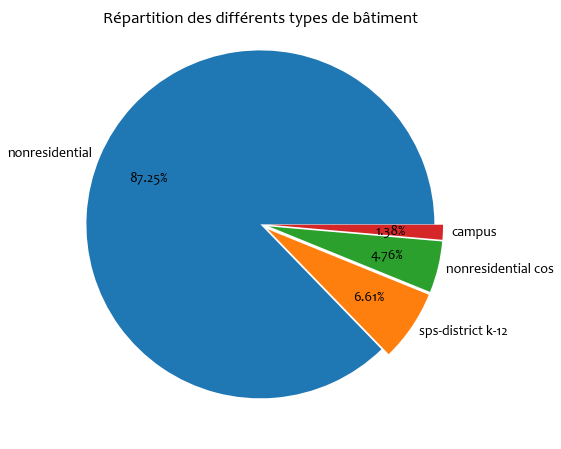

In [105]:
font = {'family' : 'Candara',
        'weight' : 'light',
        'size'   : 14}

plt.rc('font', **font)

plt.figure(figsize = (8,8))
ax = plt.pie(data.buildingtype.value_counts(), labels = data.buildingtype.value_counts().index, explode = [0, 0.05,0.05,0.05], autopct = '%.2f%%', pctdistance = 0.7, labeldistance = 1.05)
plt.title('Répartition des différents types de bâtiment', y=0.95);

# Primary property type

In [106]:
data.primarypropertytype.value_counts()

small- and mid-sized office    235
other                          203
warehouse                      167
k-12 school                    119
retail store                    81
large office                    76
mixed use property              71
worship facility                62
hotel                           59
distribution center             50
supermarket/grocery store       31
medical office                  29
self-storage facility           26
college/university              20
residence hall                  17
senior care community           16
restaurant                      12
refrigerated warehouse          11
laboratory                       7
hospital                         4
non-refrigerated warehouse       3
office                           3
Name: primarypropertytype, dtype: int64

In [107]:
def regroup(colonne, new_word, list_to_replace):
    
    data[colonne] = data[colonne].apply(lambda x: new_word if x in list_to_replace else x)
    
    pass

In [108]:
data[data.primarypropertytype =='other'].largestpropertyusetype.unique()

array(['police station', 'other - entertainment/public assembly',
       'courthouse', 'other', 'automobile dealership', 'museum',
       'repair services (vehicle, shoe, locksmith, etc)',
       'other - lodging/residential', 'other/specialty hospital',
       'parking', 'data center', 'urgent care/clinic/other outpatient',
       'other - services', 'strip mall', 'other - recreation',
       'lifestyle center', 'other - public services', 'other - mall',
       'financial office', 'manufacturing/industrial plant',
       'social/meeting hall', 'other - education', 'fire station',
       'performing arts', 'residential care facility', 'bank branch',
       'food service', 'adult education', 'library', 'other - utility',
       'movie theater', 'outpatient rehabilitation/physical therapy',
       'personal services (health/beauty, dry cleaning, etc)',
       'fitness center/health club/gym', 'pre-school/daycare',
       'prison/incarceration'], dtype=object)

In [109]:
data['primarypropertytype'] = data.apply(lambda x: x['largestpropertyusetype'] if (x['primarypropertytype'] == 'other') else x['primarypropertytype'], axis = 1)

In [110]:
data[data.primarypropertytype =='mixed use property'].largestpropertyusetype.unique()

array(['social/meeting hall', 'other - entertainment/public assembly',
       'restaurant', 'laboratory', 'non-refrigerated warehouse', 'office',
       'retail store', 'mixed use property', 'parking',
       'multifamily housing', 'other', 'distribution center',
       'supermarket/grocery store', 'other - restaurant/bar', 'hotel',
       'medical office', 'strip mall', 'fitness center/health club/gym',
       'other - education', 'residence hall/dormitory',
       'other - recreation'], dtype=object)

In [111]:
data['primarypropertytype'] = data.apply(lambda x: x['largestpropertyusetype'] if (x['primarypropertytype'] == 'mixed use property') else x['primarypropertytype'], axis = 1)

In [112]:
def regroupcol(colonne):
    
    #regrouper warehouse
    regroup(colonne, 'warehouse', ['warehouse', 'refrigerated warehouse', 'non-refrigerated warehouse', 'distribution center', 'self-storage facility'])

    #regrouper ecoles
    regroup(colonne, 'education', ['k-12 school', 'college/university', 'other - education', 'adult education', 'pre-school/daycare', 'vocational school'])

    #regrouper bureaux
    regroup(colonne, 'office', ['small- and mid-sized office', 'large office', 'office', 'financial office'])

    #regrouper store
    regroup(colonne, 'store', ['retail store', 'supermarket/grocery store', 'repair services (vehicle, shoe, locksmith, etc)', 'automobile dealership', 'strip mall', 'other - mall',
                               'convenience store without gas station'])

    #regrouper medical
    regroup(colonne, 'medical', ['medical office', 'laboratory', 'hospital', 'other/specialty hospital', 'urgent care/clinic/other outpatient', 'outpatient rehabilitation/physical therapy',
                                'hospital (general medical & surgical)'])

    #regrouper service habitation
    regroup(colonne, 'residential services', ['hotel', 'residence hall', 'senior care community', 'residential care facility', 'residence hall/dormitory'])

    #regrouper other
    data[colonne] = data[colonne].apply(lambda x: 'other' if x not in ['office', 'warehouse', 'education', 'store', 'residential services', 'worship facility', 'medical', 'aucun'] else x)
    
    pass

In [113]:
regroupcol('primarypropertytype')

In [114]:
data.primarypropertytype.value_counts()

office                  335
warehouse               268
other                   210
education               145
store                   137
residential services     95
worship facility         62
medical                  50
Name: primarypropertytype, dtype: int64

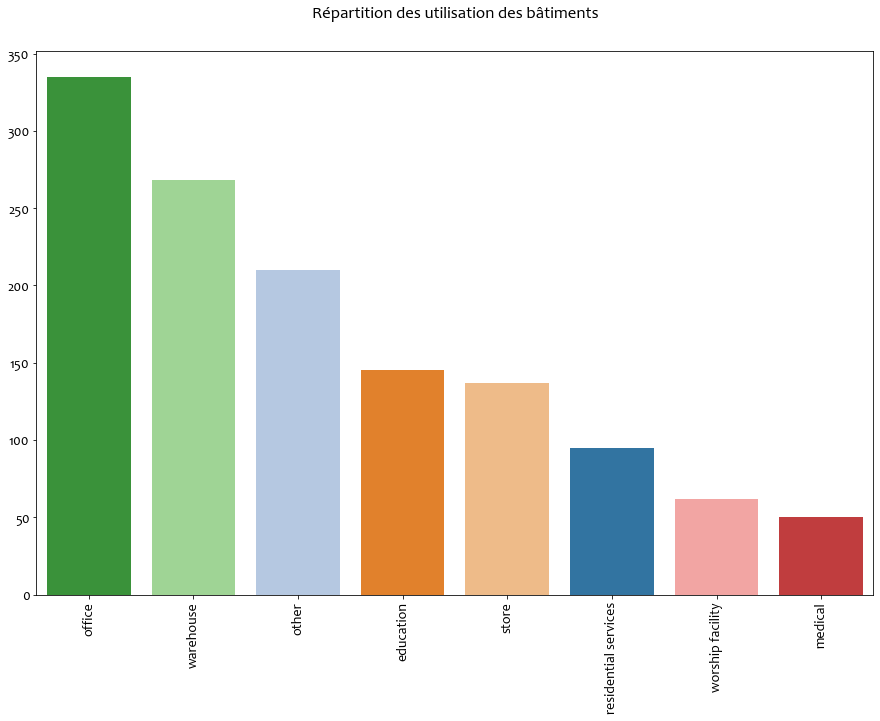

In [115]:
plt.figure(figsize = (15,10))

custom_palette = {} #utiliser palette custom pour garder meme couleurs
for m,n in enumerate(data.primarypropertytype.unique()):
    custom_palette[n] = sns.color_palette("tab20", len(data.primarypropertytype.unique()))[m]

ax = sns.barplot(x = data.primarypropertytype.value_counts().index, y = data.primarypropertytype.value_counts().values, palette = custom_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Répartition des utilisation des bâtiments', y = 1.05);

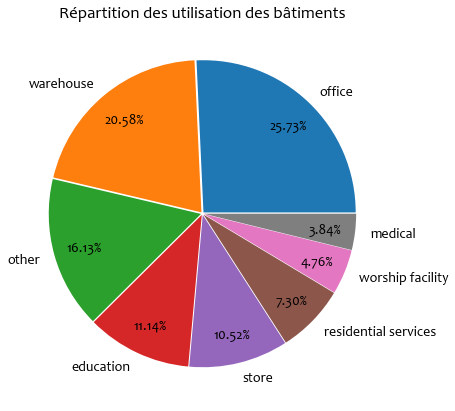

In [116]:
plt.figure(figsize = (7,7))
ax = plt.pie(data.primarypropertytype.value_counts().values, labels =data.primarypropertytype.value_counts().index, explode = [0.01 for i in np.arange(8)] , autopct = '%.2f%%', pctdistance = 0.8)
plt.title('Répartition des utilisation des bâtiments');

# Age

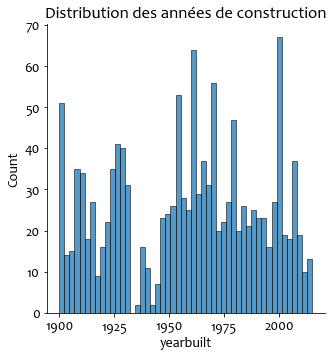

In [117]:
sns.displot(data.yearbuilt, bins = 50)
plt.title('Distribution des années de construction');

In [118]:
#passage a l'age => meilleure variable pour la normalisation des données

data['age_derniere_reno'] = data.apply(lambda x: x['datayear']-x['yearbuilt'], axis = 1)

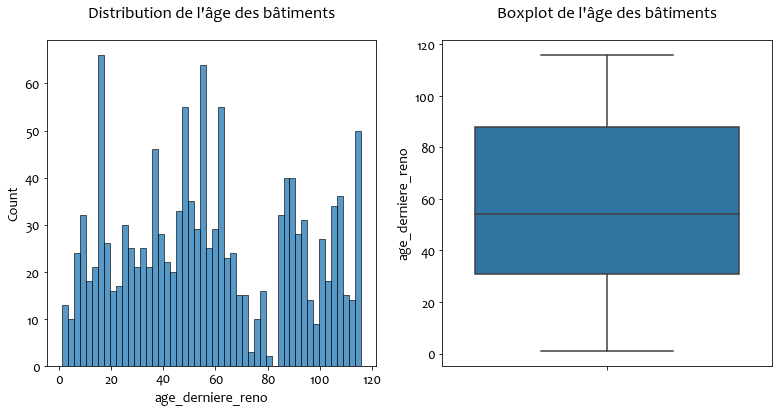

In [120]:
fig = plt.figure(figsize = (13,6))

fig.add_subplot(1,2,1)
ax = sns.histplot(data = data, x = 'age_derniere_reno', bins = 50)
plt.title('Distribution de l\'âge des bâtiments', y=1.05)

fig.add_subplot(1,2,2)
ax = sns.boxplot(data = data, y = 'age_derniere_reno', showfliers = True)
plt.title('Boxplot de l\'âge des bâtiments', y= 1.05);

In [121]:
data.drop('state', axis = 1, inplace = True)
data.drop('city', axis = 1, inplace = True)

In [122]:
#pour éviter fuite des données

def ratio_conso(nouvelle_colonne, type_conso):
    
    data[nouvelle_colonne] = data.apply(lambda x: x[type_conso]*100/x['siteenergyuse(kbtu)'], axis =1)
    
    pass

In [123]:
data['otherfueluse(kbtu)'].fillna(0, inplace = True)

In [124]:
ratio_conso('electricity_ratio', 'electricity(kbtu)')
ratio_conso('gas_ratio', 'naturalgas(kbtu)')
ratio_conso('steam_ratio', 'steamuse(kbtu)')
ratio_conso('other_fuel_ratio', 'otherfueluse(kbtu)')

In [125]:
for col in ['electricity_ratio', 'gas_ratio', 'steam_ratio', 'other_fuel_ratio']:
    
    data[col] = data[col].apply(lambda x: 10*round(x/10)) #on arrondi a la dizaine

In [126]:
data[(data.electricity_ratio + data.gas_ratio + data.steam_ratio + data.other_fuel_ratio) !=100].index #regarder quand la somme n'est pas egale à 100

Int64Index([  11,   50,  191,  200,  207,  217,  235,  351,  390,  404,  420,
             450,  479,  614,  632,  676,  682,  815,  926,  930,  959, 1002,
            1062, 1066, 1121, 1144, 1258, 1272, 1273, 1274],
           dtype='int64')

In [127]:
data.loc[[  11,   50,  191,  200,  207,  217,  235,  351,  390,  404,  420,
             450,  479,  614,  632,  676,  682,  815,  926,  930,  959, 1002,
            1062, 1066, 1121, 1144, 1258, 1272, 1273, 1274]]

,osebuildingid,datayear,buildingtype,primarypropertytype,taxparcelidentificationnumber,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),sourceeui(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,outlier,seattle police department micro community policing plan areas,spd beats,zip codes,latitude,longitude,address,zipcode,countofallpropertyusetypes,age_derniere_reno,electricity_ratio,gas_ratio,steam_ratio,other_fuel_ratio
11,19,2016,nonresidential,residential services,0942000265,7,downtown,1922,1.0,11.0,92190.0,25200.0,66990.0,"hotel, parking",hotel,67390.0,parking,25200.0,aucun,0.0,35.0,159.500000,297.399994,1.075001e+07,1.117920e+07,4.870848e+06,3832369.0,2046793.0,0.0,511.390,5.550,False,NaN,14.0,19.0,18081.0,47.60755,-122.33244,1100 5th avenue,98101.0,2.0,94,40,20,50,0
50,103,2016,nonresidential cos,other,1985200003,7,magnolia / queen anne,1962,1.0,1.0,389000.0,0.0,389000.0,other,other,368000.0,aucun,0.0,aucun,0.0,NaN,64.300003,151.600006,2.365898e+07,2.373692e+07,6.093150e+06,14419146.0,688680.0,0.0,607.410,1.560,False,NaN,NaN,NaN,NaN,47.62208,-122.35398,334 1st ave. n,98109.0,1.0,54,60,0,30,0
191,398,2016,nonresidential,office,0653000250,7,downtown,1916,1.0,6.0,350310.0,0.0,350310.0,"college/university, office, restaurant",office,305233.0,college/university,26900.0,restaurant,7666.0,89.5,54.000000,155.899998,1.834424e+07,1.719162e+07,0.000000e+00,16128131.5,2127656.0,2304567.0,168.930,0.380,False,NaN,5.0,9.0,19576.0,47.61429,-122.35263,2601 elliott avenue,98121.0,3.0,100,90,10,0,10
200,411,2016,nonresidential,office,1975700305,7,downtown,1910,1.0,10.0,130513.0,0.0,130513.0,"office, restaurant, retail store",office,87391.0,retail store,32264.0,restaurant,10858.0,49.0,86.950002,204.250003,1.134585e+07,1.155309e+07,5.586055e+05,7013740.0,3773653.0,0.0,292.430,2.125,False,NaN,14.0,24.0,18081.0,47.60991,-122.33687,1425 4th avenue,98101.0,3.0,106,60,30,0,0
207,419,2016,campus,store,1976200205,7,downtown,1908,1.0,4.0,137400.0,0.0,137400.0,"food sales, multifamily housing, office, other...",retail store,44078.0,other - restaurant/bar,19182.0,multifamily housing,14380.0,NaN,118.450002,332.450003,1.441194e+07,1.438157e+07,0.000000e+00,12114344.5,4595774.0,0.0,206.495,1.285,False,NaN,14.0,30.0,18081.0,47.60881,-122.34119,1501 pike place,98101.0,9.0,108,80,30,0,0
217,437,2016,nonresidential,medical,1978200280,3,east,1945,1.0,3.0,266000.0,104000.0,162000.0,"medical office, parking",medical office,162000.0,parking,104000.0,aucun,0.0,65.0,87.600001,247.299998,1.418878e+07,1.434550e+07,6.365164e+05,11994475.5,1558038.0,0.0,215.495,0.715,False,NaN,19.0,12.0,18081.0,47.61048,-122.32837,901 university street,98101.0,2.0,71,80,10,0,0
235,466,2016,nonresidential,medical,1979200225,3,east,1975,1.0,8.0,158738.0,0.0,158738.0,urgent care/clinic/other outpatient,urgent care/clinic/other outpatient,158738.0,aucun,0.0,aucun,0.0,NaN,404.750003,1069.749988,6.425138e+07,6.275952e+07,5.904740e+06,48538929.0,9794146.0,15527.0,1314.320,7.595,False,NaN,19.0,12.0,18081.0,47.60953,-122.32793,1100 9th avenue,98101.0,1.0,41,80,20,10,0
351,678,2016,nonresidential,office,8591400005,7,downtown,1900,1.0,6.0,205521.0,0.0,205521.0,"office, retail store",office,114919.0,retail store,28643.0,aucun,0.0,93.5,57.500000,127.049998,8.254992e+06,8.694768e+06,2.022097e+06,4432849.0,1800139.5,0.0,282.590,1.325,False,NaN,14.0,19.0,18379.0,47.60353,-122.33558,"811 first avenue, suite 350",98104.0,2.0,116,50,20,20,0
390,757,2016,nonresidential,office,1977200280,7,downtown,1979,1.0,7.0,131143.0,87160.0,43983.0,"office, retail store

In [ ]:
#c'est a cause des arrondis, il y a tre speu de batiments qui ont cette erreur on va garder tel quel.

# Property use types

In [128]:
regroupcol('largestpropertyusetype')
regroupcol('secondlargestpropertyusetype')
regroupcol('thirdlargestpropertyusetype')

#regrouper selon les catégories définies précédemment

# District

In [129]:
len(data.taxparcelidentificationnumber.unique()) #presque un identifiant par patiment, trop de differents

1244

In [130]:
data.drop('taxparcelidentificationnumber', axis = 1, inplace = True)

In [131]:
data.councildistrictcode.value_counts().sort_index()

1     99
2    342
3    153
4    124
5    114
6     92
7    378
Name: councildistrictcode, dtype: int64

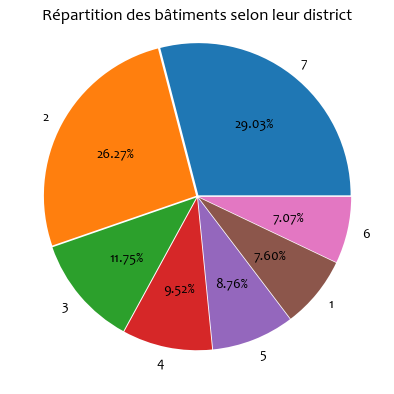

In [132]:
fig = plt.figure(figsize = (8,7))
ax = plt.pie(data.councildistrictcode.value_counts().values, labels = data.councildistrictcode.value_counts().index, autopct = '%.2f%%', explode = [0.01 for i in np.arange(len(data.councildistrictcode.unique()))])
plt.title('Répartition des bâtiments selon leur district', y=0.95);

In [133]:
data.neighborhood.unique()

array(['downtown', 'southeast', 'northeast', 'central', 'north',
       'lake union', 'greater duwamish', 'magnolia / queen anne',
       'ballard', 'northwest', 'east', 'delridge', 'southwest',
       'delridge neighborhoods'], dtype=object)

In [134]:
data['neighborhood'] = data.neighborhood.apply(lambda x: 'delridge' if 'delridge' in x else x)

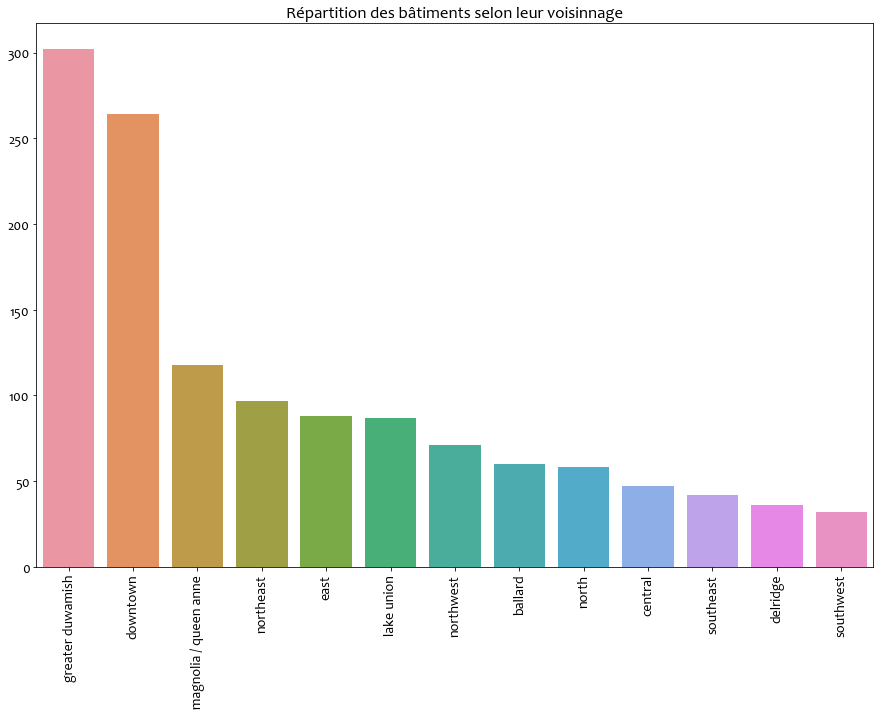

In [135]:
fig = plt.figure(figsize = (15,10))
ax = sns.barplot(x=data.neighborhood.value_counts().index, y = data.neighborhood.value_counts().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Répartition des bâtiments selon leur voisinnage');

## neighborhood

In [136]:
def custom_palette(dataframe,variable):
    
    custom_palette = {}
    for m,n in enumerate(dataframe[variable].unique()):
        custom_palette[n] = sns.color_palette("tab20", len(dataframe[variable].unique()))[m]
    
    return custom_palette

In [137]:
def barplot_variable_district(variable, rot, taille =(30,20), hspace = 0.3): #on va tracer les répartitions de la variable selon les differents districts
    
    fig = plt.figure(figsize=taille)

    for i,j in enumerate(data.councildistrictcode.sort_values().unique()): #itération sur les districts de 1 a 7

        df = data[data.councildistrictcode == j][variable].value_counts() #on s elimite au district et on regarde les counts d ela variable
        fig.add_subplot(3,3,i+1)
        ax = sns.barplot(x = df.index, y = df.values, palette = custom_palette(data,variable))
        ax.set_title('council district code '+ str(j), y =1.03)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = rot)
        
    fig.suptitle('Répartition de '+variable +' selon le district', y=0.93)
    plt.subplots_adjust(hspace = hspace)
        
    pass

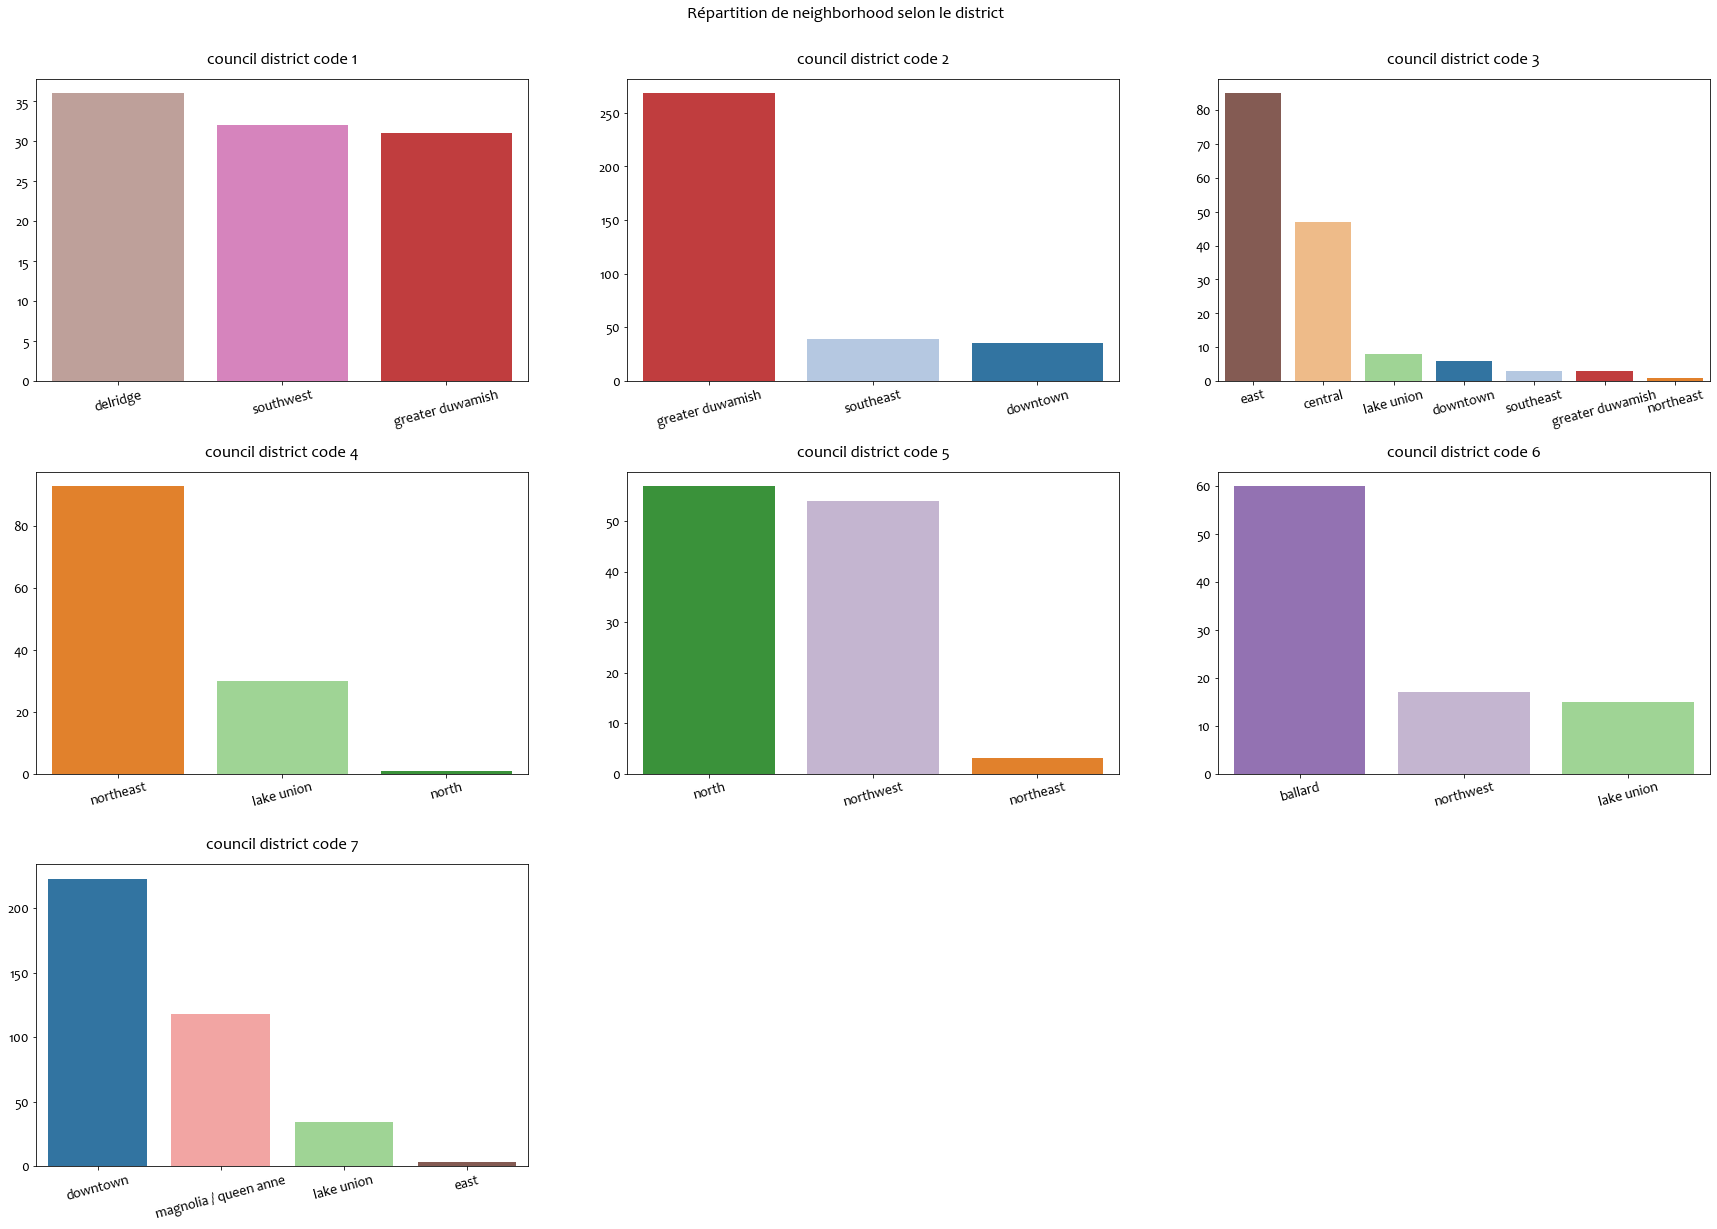

In [138]:
barplot_variable_district('neighborhood', 15)

## age par district

In [139]:
def histplot_variable_district(variable, largeur = None): #on regarde la distribution des ages des batiments dans les différents districts( meme logique que précédemment)

    fig = plt.figure(figsize=(25,12))

    for i,j in enumerate(data.councildistrictcode.sort_values().unique()):
        
        df = data[data.councildistrictcode == j]
        
        #on va ecarter un peu autour des valeurs min et max d el'age
        inf = min(0,df[variable].min())-5
        sup = max(100, df[variable].max())+5
        
        fig.add_subplot(2,4,i+1)
        ax = sns.histplot(data = df, x = variable, bins = 30, binwidth=largeur)
        ax.set_title('council district code '+ str(j), y = 1.03)
        ax.set(xlim=(inf, sup))
        
    fig.suptitle('distribution de '+variable+' selon le district', y =0.97)
    plt.subplots_adjust(hspace = 0.3)
    
    pass
    

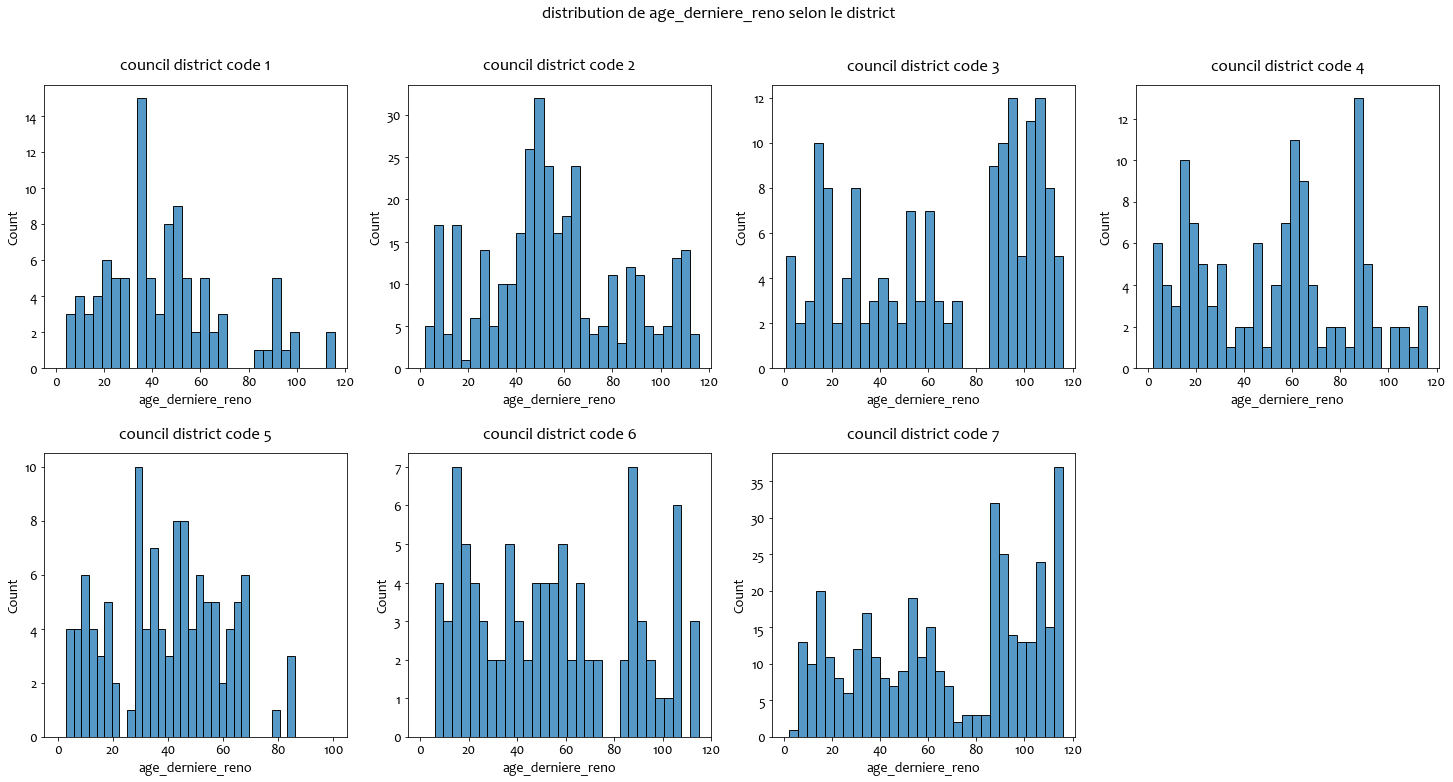

In [140]:
histplot_variable_district('age_derniere_reno') #districts plus jeunes ? plus ages ? 

## ratios par district

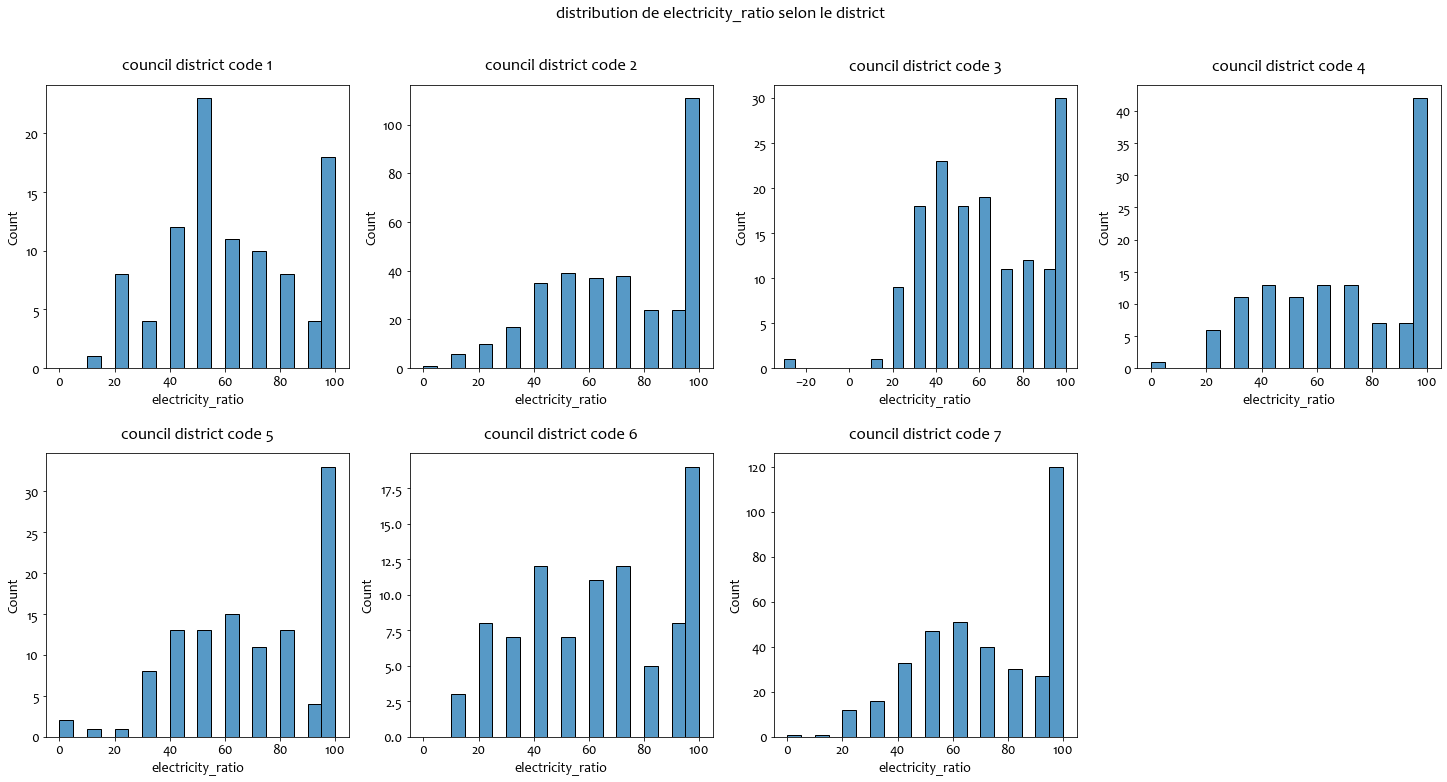

In [141]:
histplot_variable_district('electricity_ratio', 5) #districts avec consommation particuliere ? 

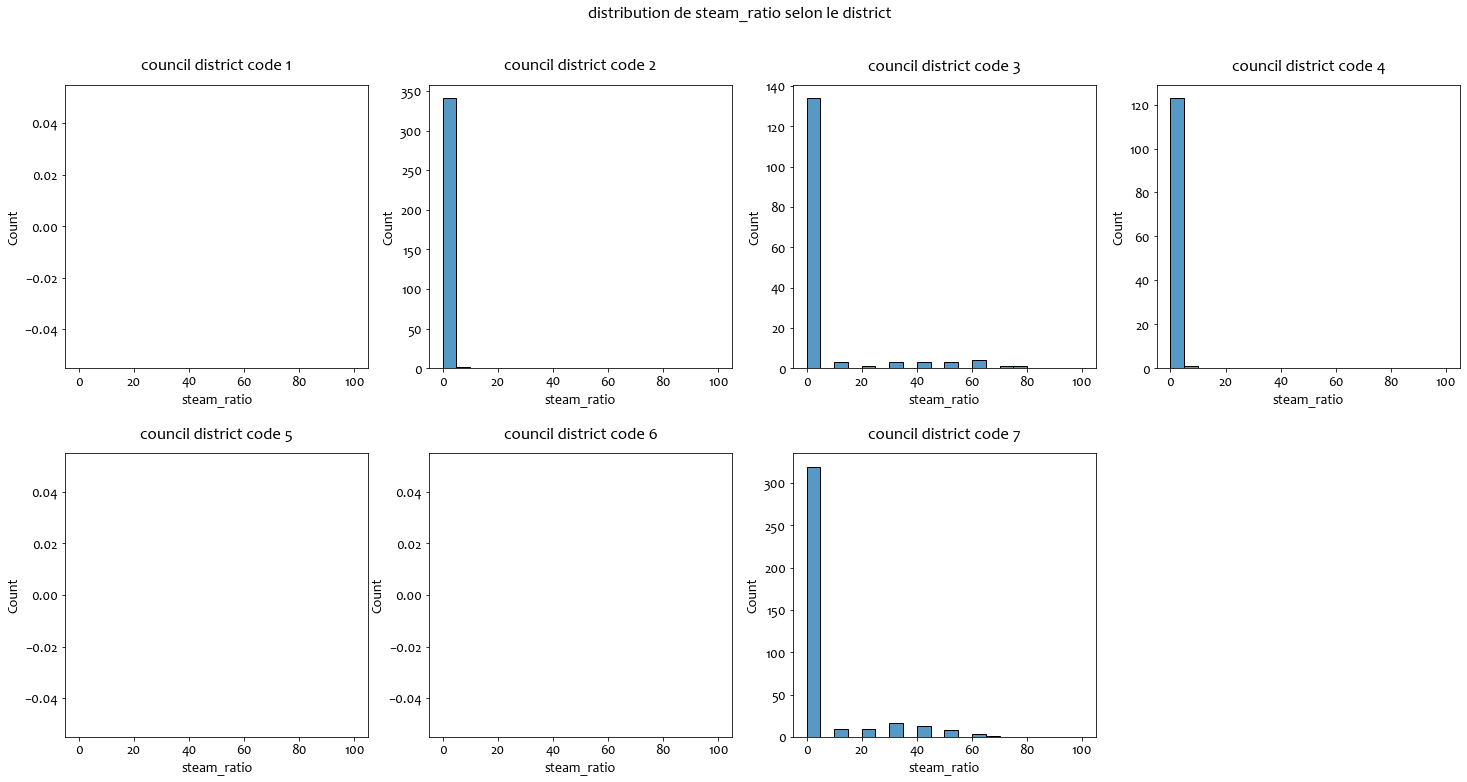

In [142]:
histplot_variable_district('steam_ratio', 5)

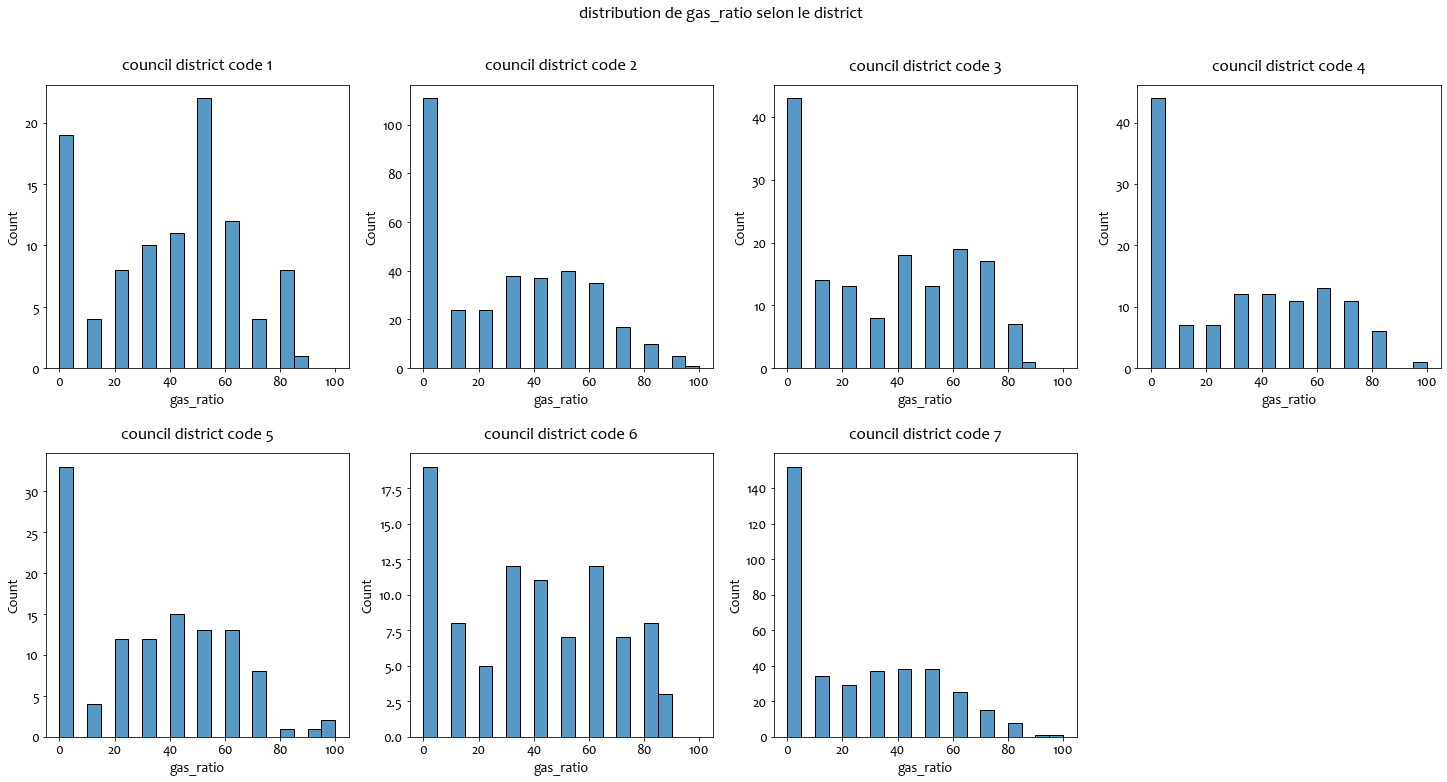

In [143]:
histplot_variable_district('gas_ratio', 5)

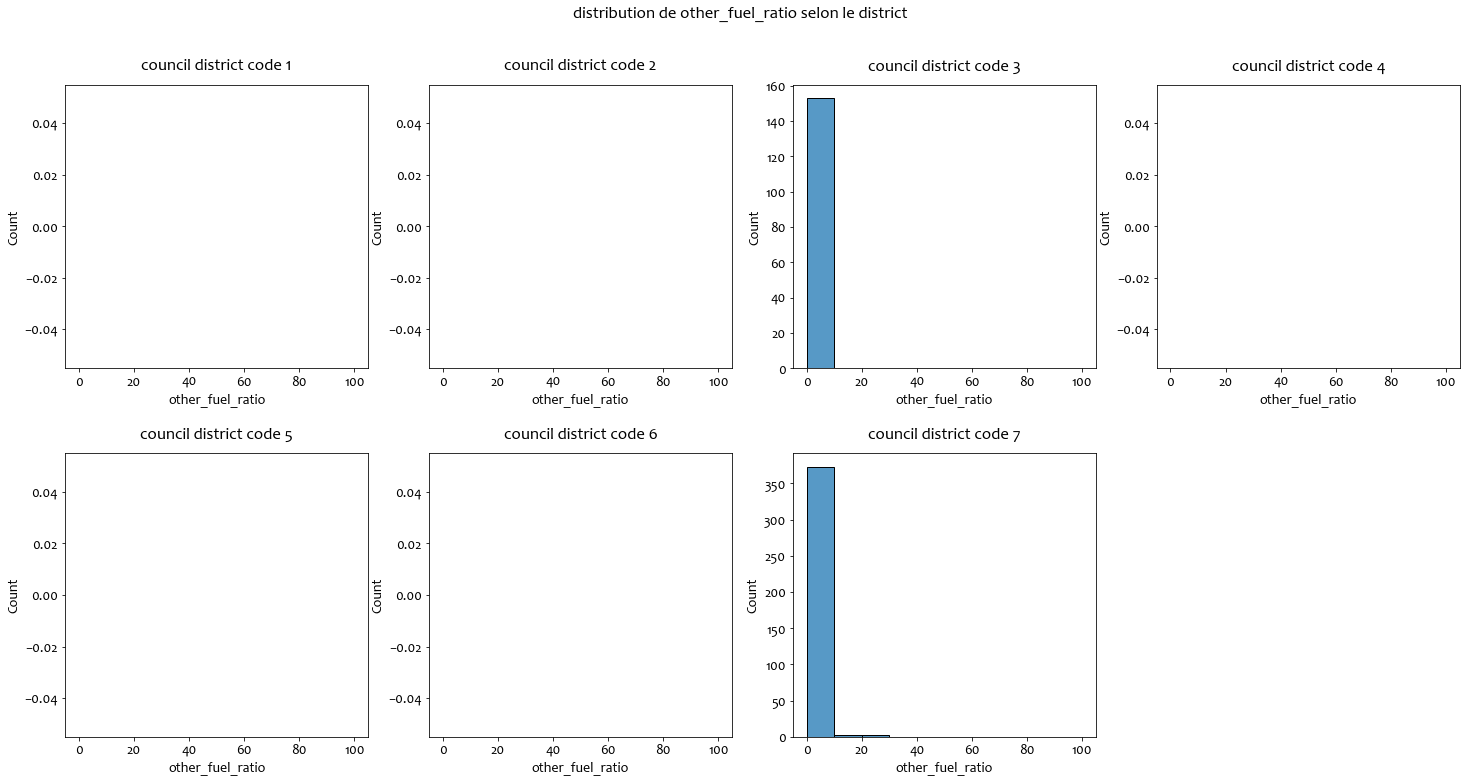

In [144]:
histplot_variable_district('other_fuel_ratio', 10)

## Primary type par district

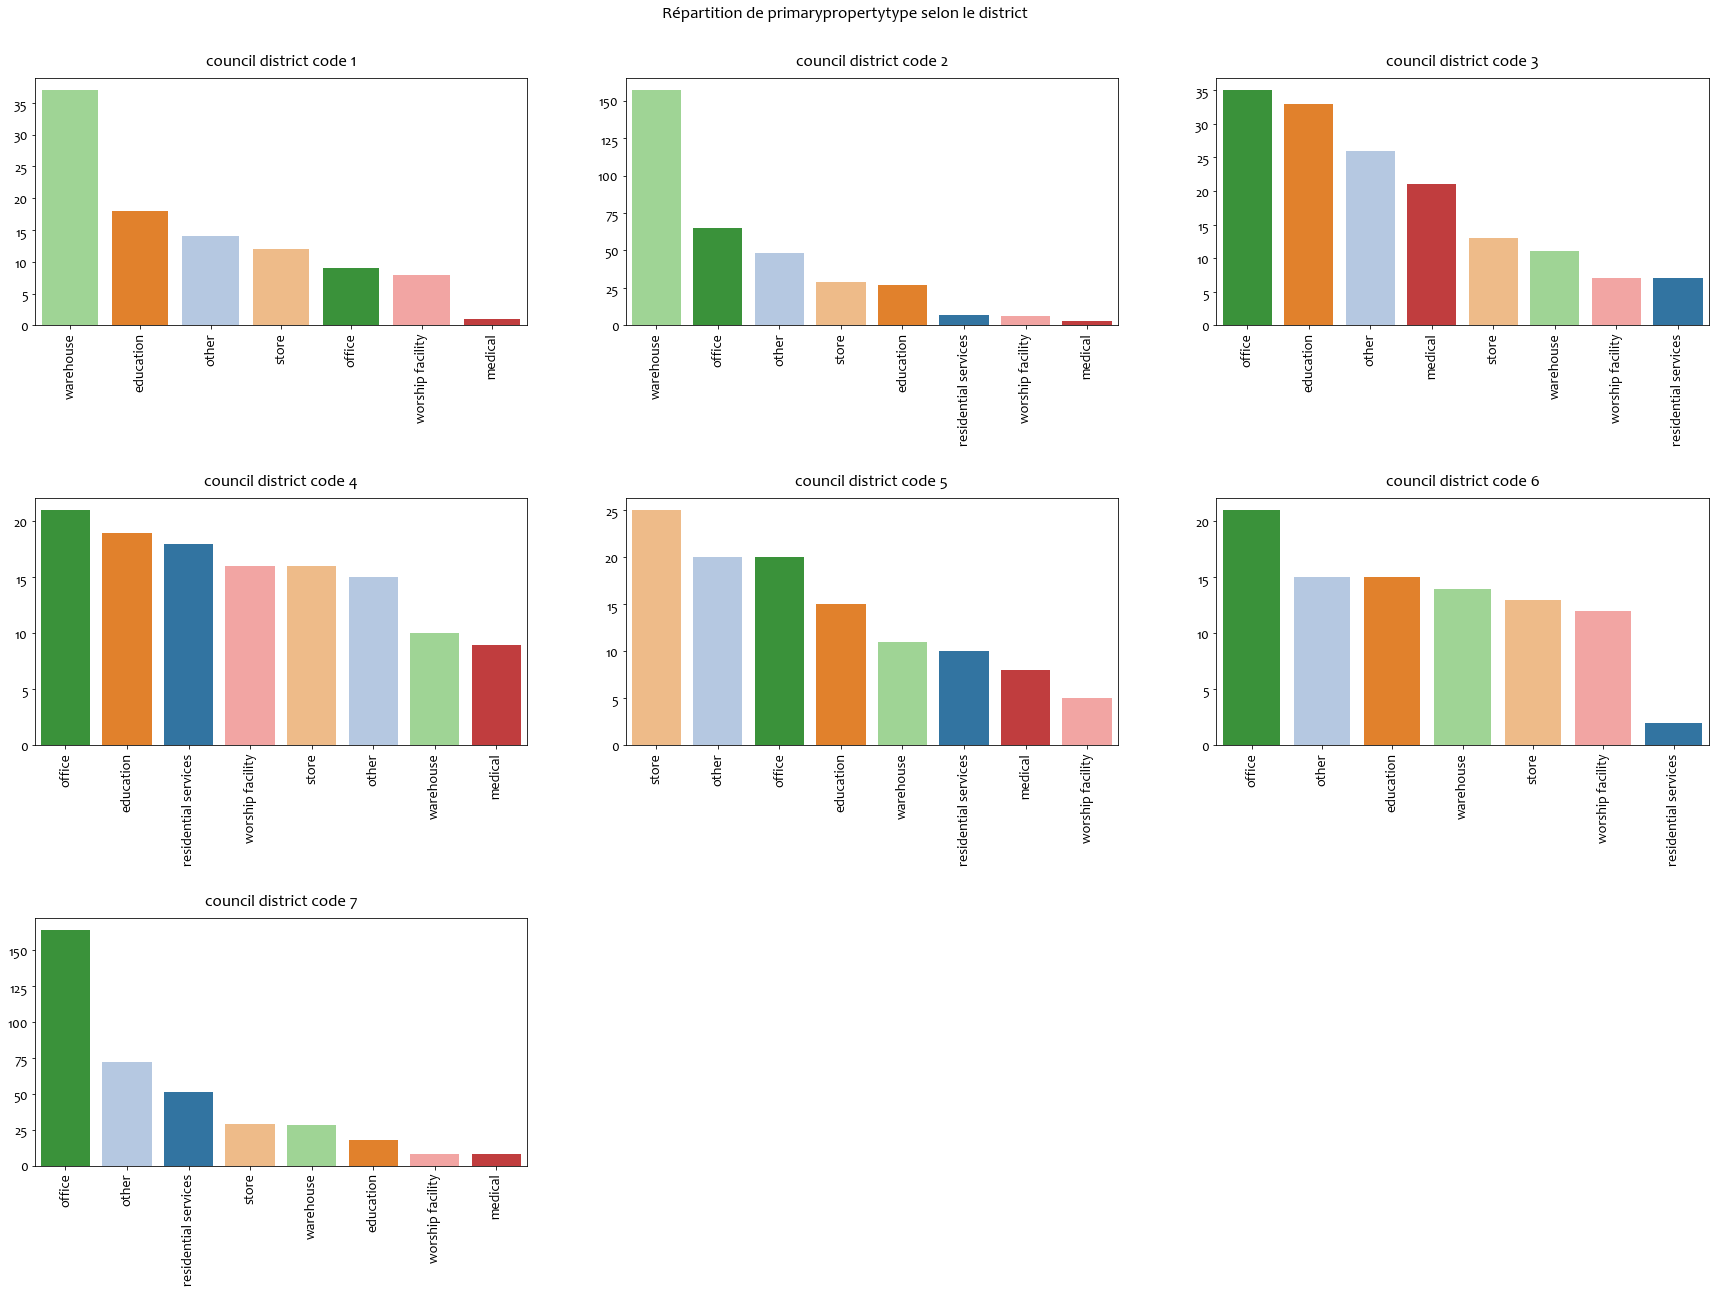

In [145]:
barplot_variable_district('primarypropertytype', 90, hspace = 0.7) #des districts qui regroupent des types ou certains types présent uniquement dans certains districts ? # a priori assez réparti

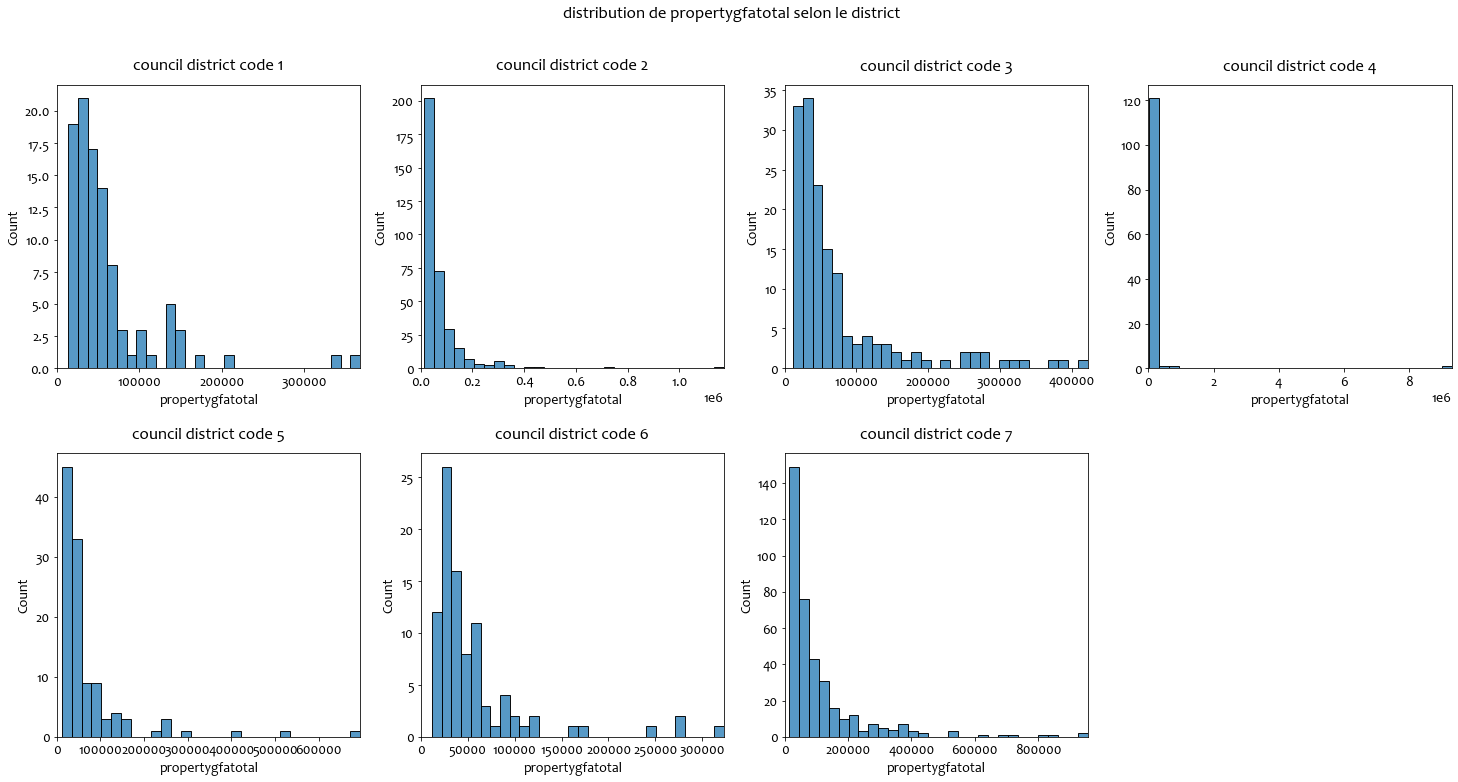

In [146]:
histplot_variable_district('propertygfatotal') #districts qui auraient que des bâtiments grands ou petits ? 

## largest use

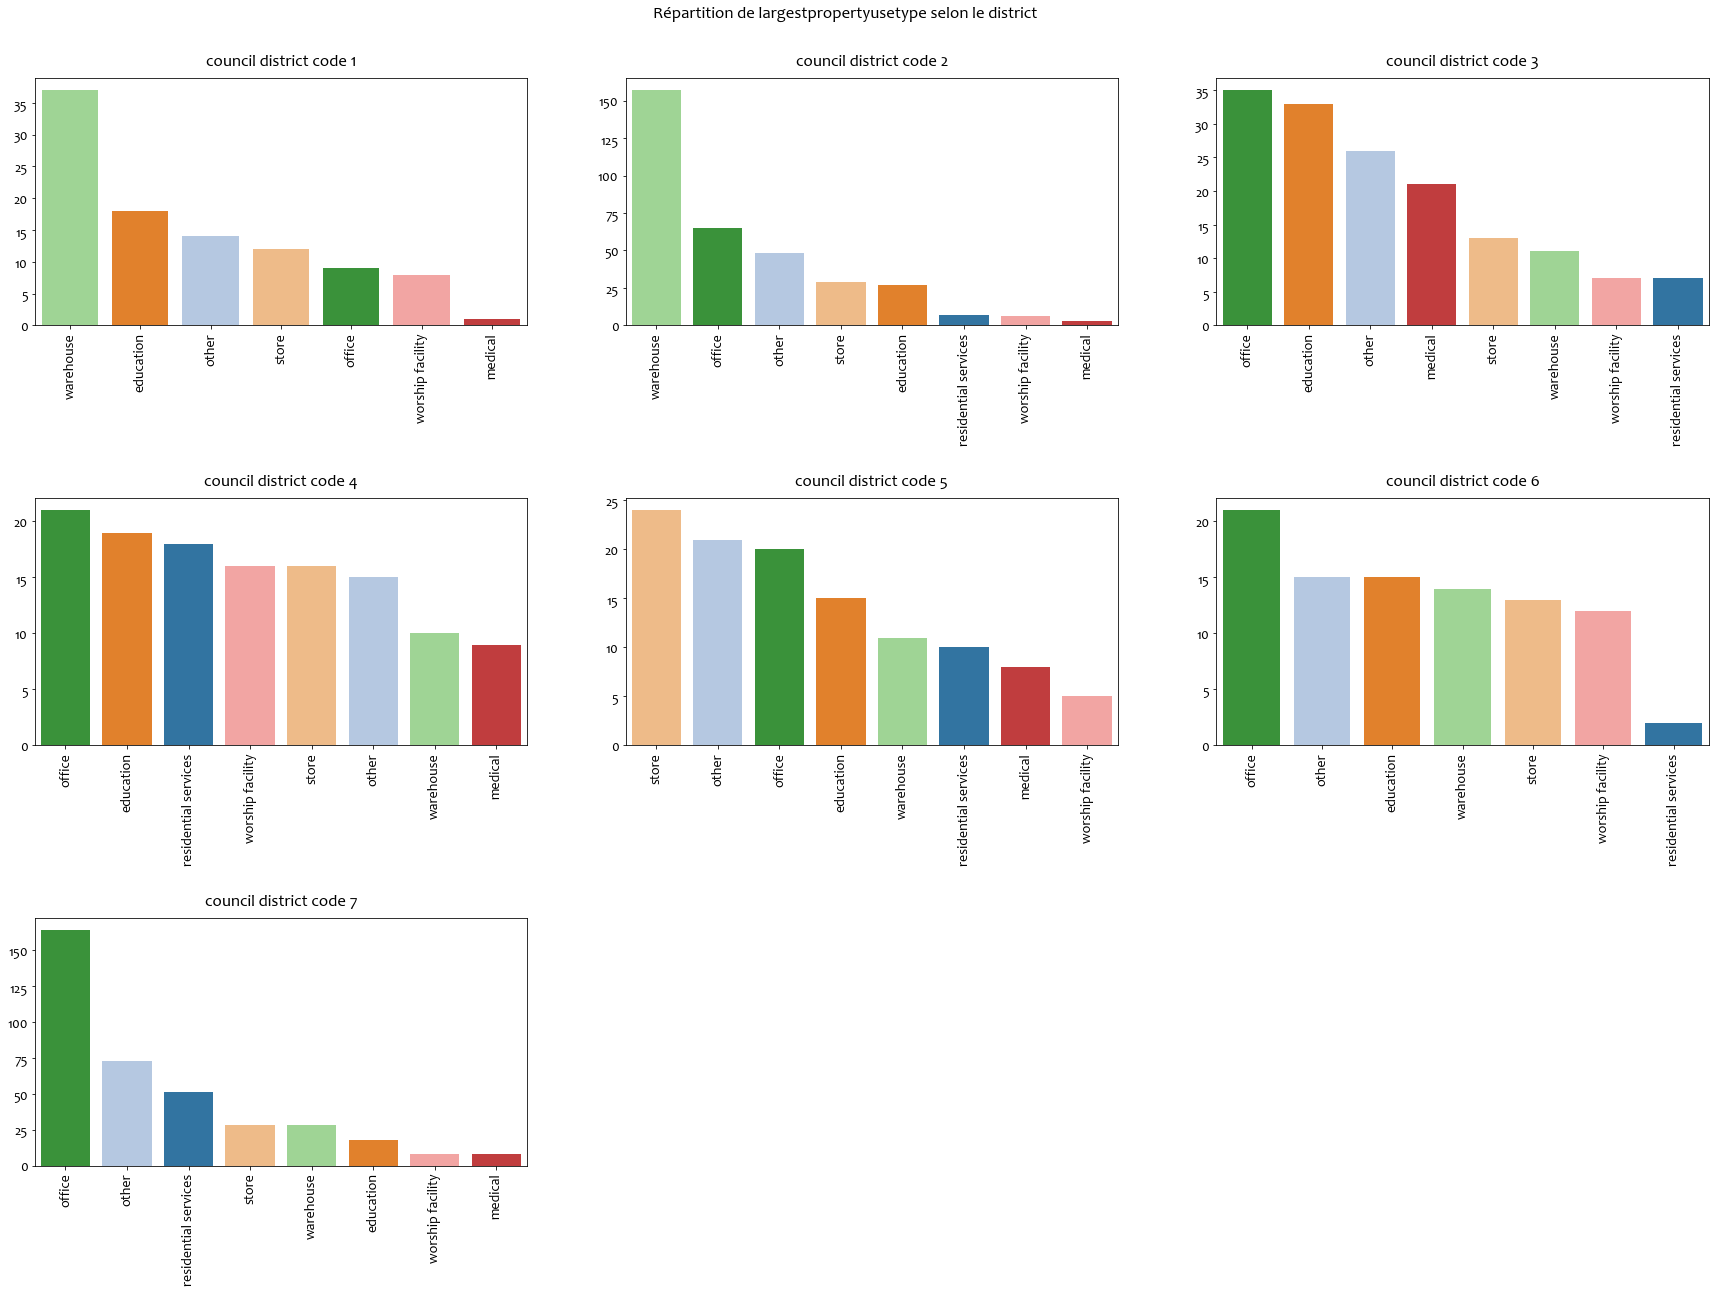

In [147]:
barplot_variable_district('largestpropertyusetype', 90, hspace = 0.7)

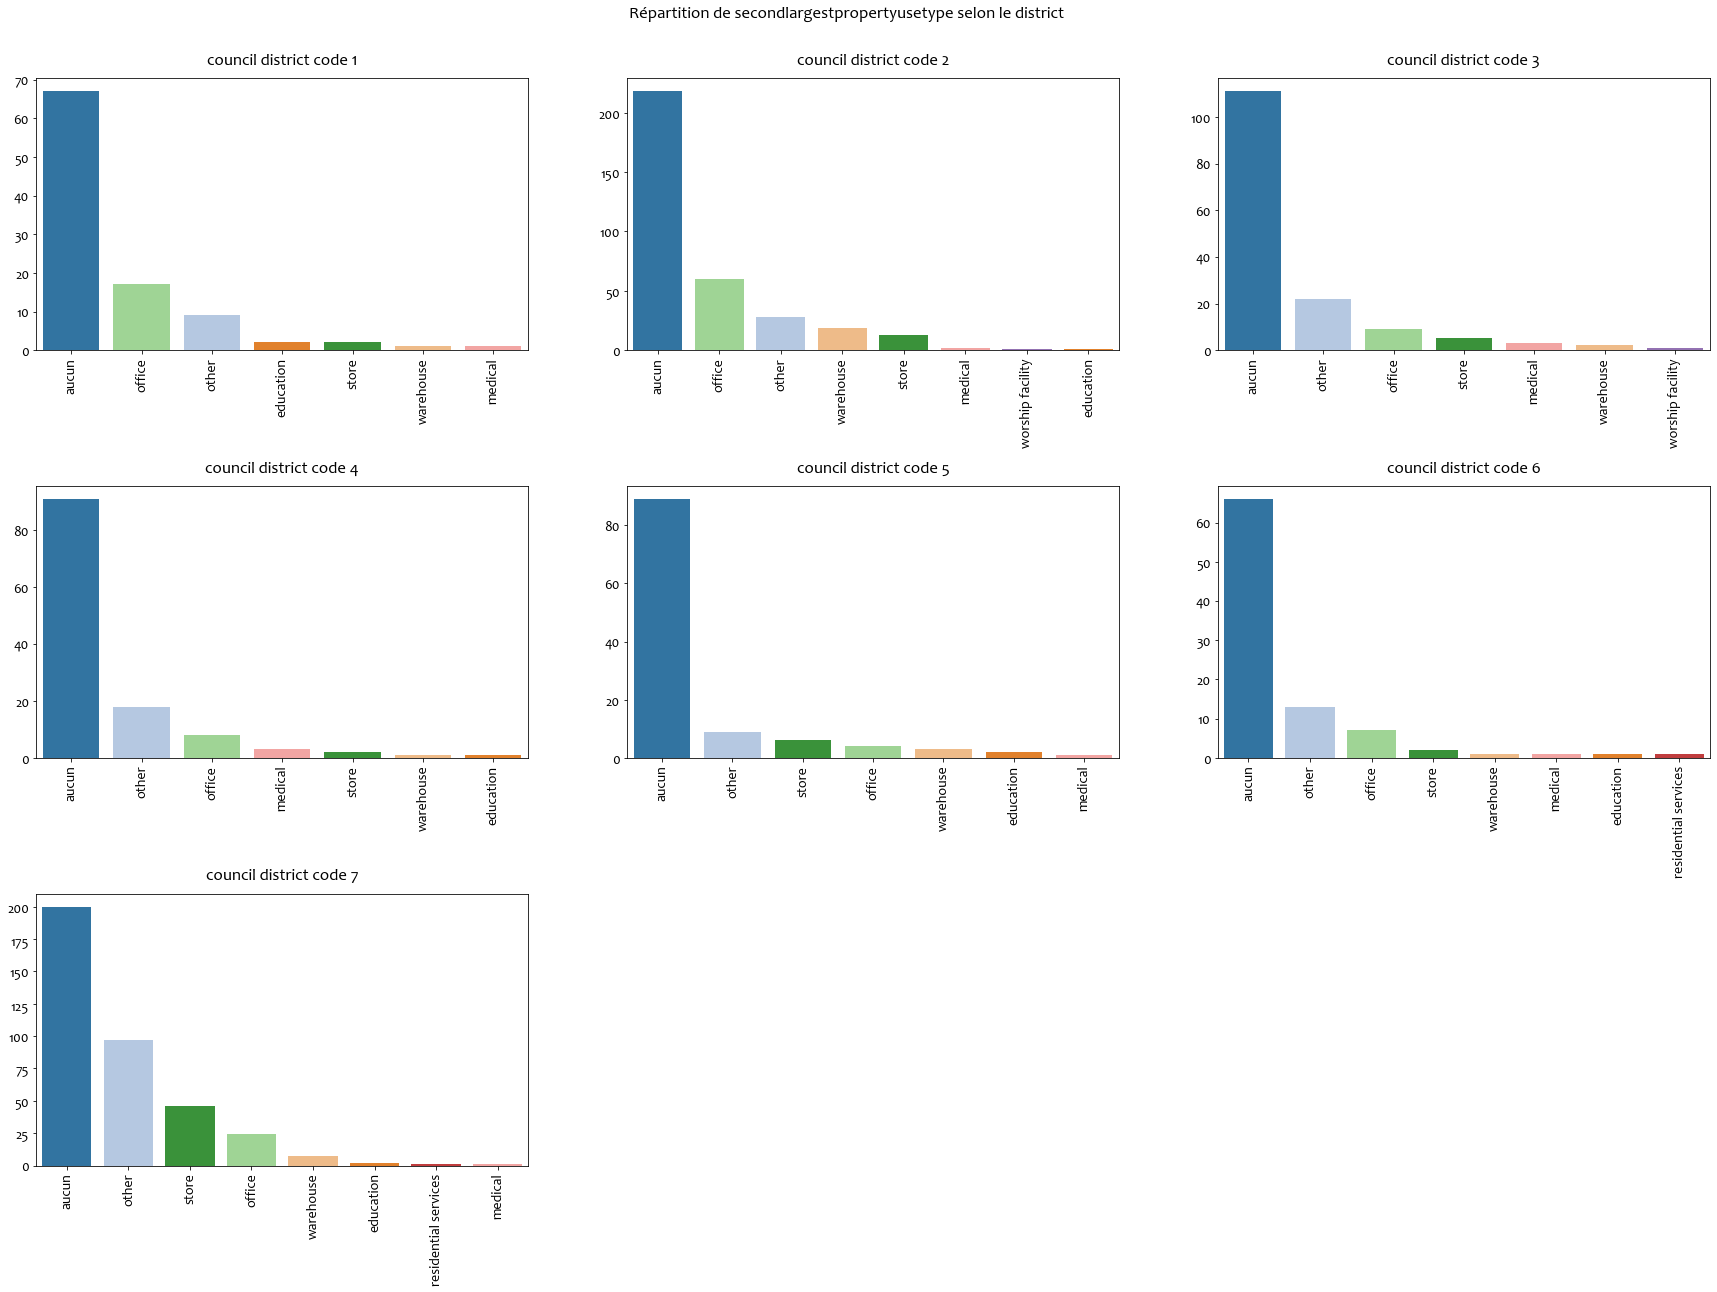

In [148]:
barplot_variable_district('secondlargestpropertyusetype', 90, hspace = 0.5)

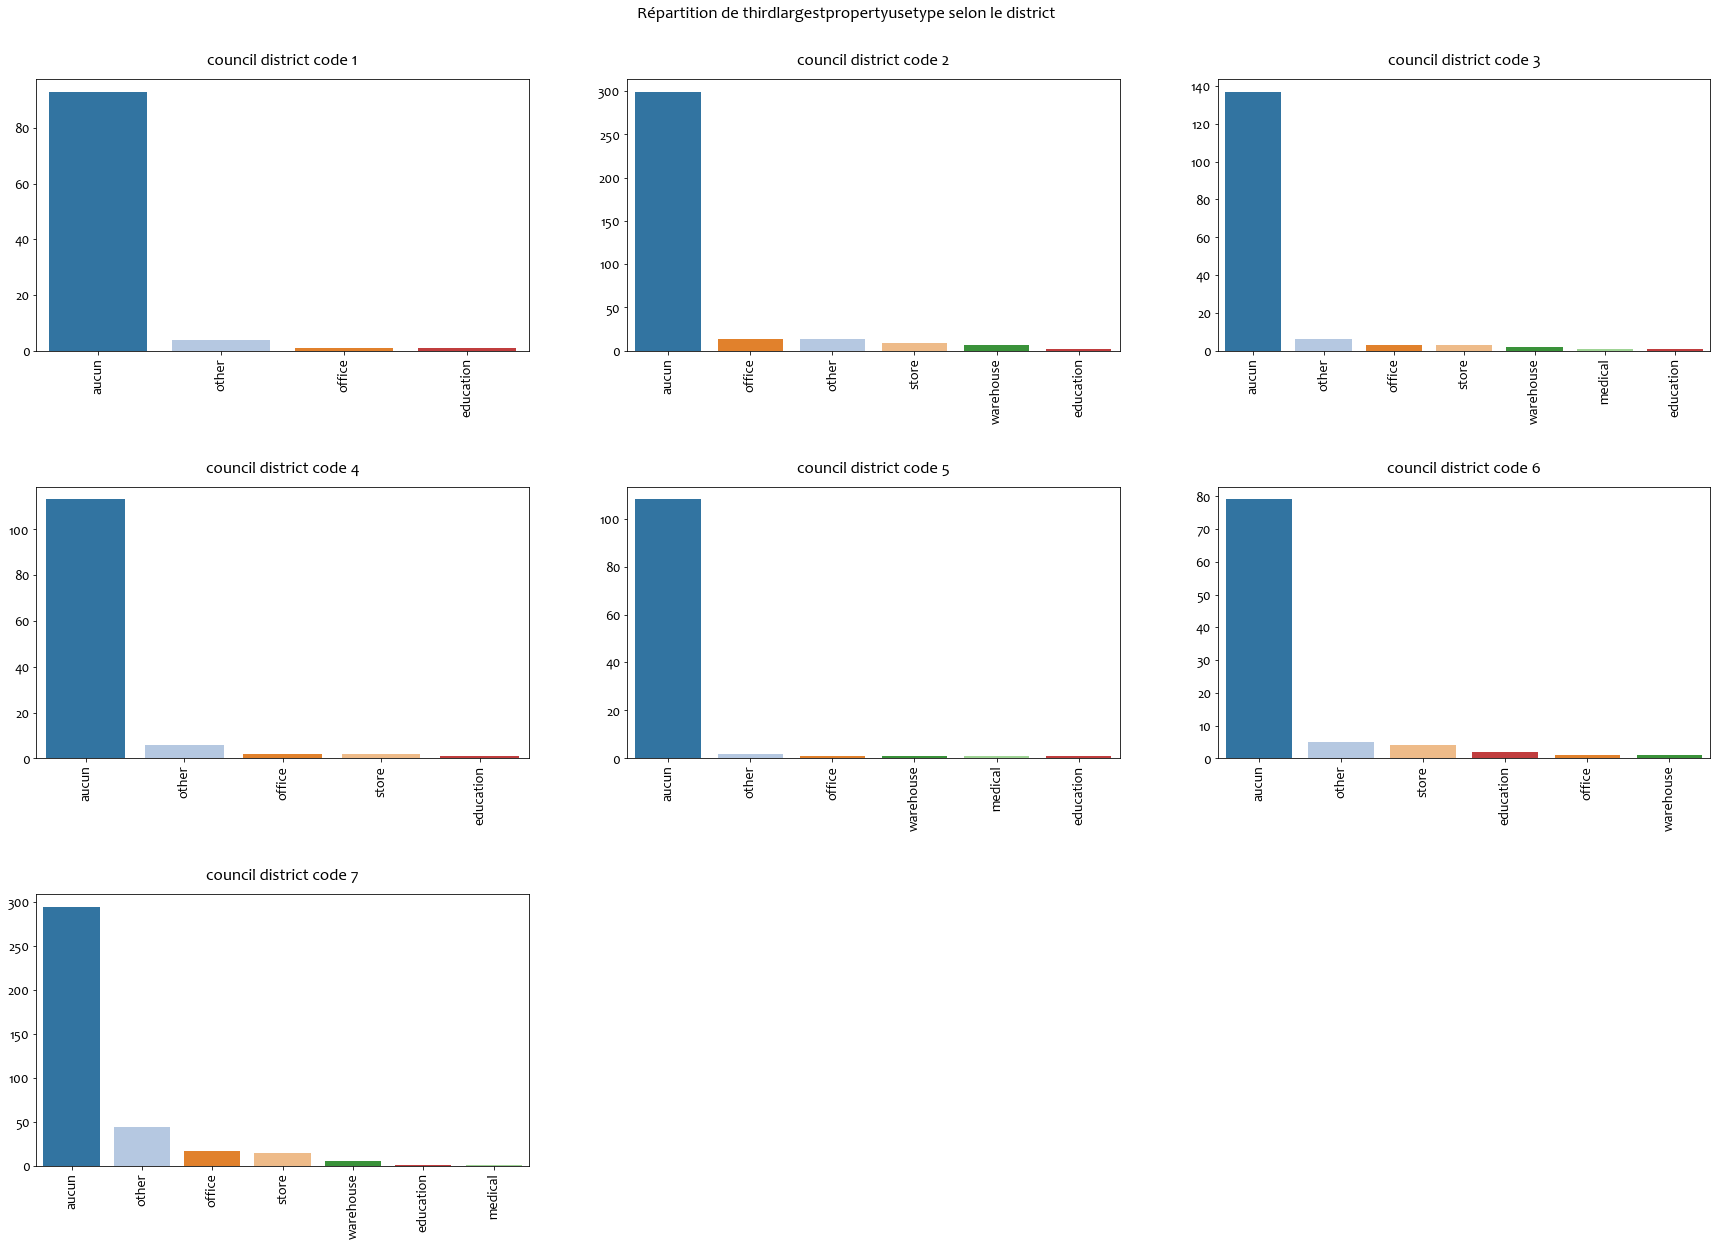

In [149]:
barplot_variable_district('thirdlargestpropertyusetype', 90, hspace = 0.5)

# Corrélation linéaire

In [150]:
data.head()

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),sourceeui(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,outlier,seattle police department micro community policing plan areas,spd beats,zip codes,latitude,longitude,address,zipcode,countofallpropertyusetypes,age_derniere_reno,electricity_ratio,gas_ratio,steam_ratio,other_fuel_ratio
0,1,2016,nonresidential,residential services,7,downtown,1927,1.0,12.0,88434.0,0.0,88434.0,hotel,residential services,88434.0,aucun,0.0,aucun,0.0,62.5,80.299998,178.000000,7103895.25,7277224.50,2.013457e+06,3816093.5,1274420.5,0.0,249.705,2.735,False,NaN,14.0,31.0,18081.0,47.6122,-122.33799,405 olive way,98101.0,1.0,89,50,20,30,0
1,2,2016,nonresidential,residential services,7,downtown,1996,1.0,11.0,103566.0,15064.0,88502.0,"hotel, parking, restaurant",residential services,83880.0,other,15064.0,other,4622.0,56.0,94.600002,183.700003,8371084.00,8715133.50,0.000000e+00,3574131.0,4797033.5,0.0,279.685,2.620,False,NaN,14.0,31.0,18081.0,47.61317,-122.33393,724 pine street,98101.0,3.0,20,40,60,0,0
2,3,2016,nonresidential,residential services,7,downtown,1969,1.0,41.0,956110.0,196718.0,759392.0,hotel,residential services,756493.0,aucun,0.0,aucun,0.0,43.0,96.000000,241.899994,72587024.00,73937112.00,2.156655e+07,49526664.0,1493800.0,0.0,2089.280,2.190,False,NaN,NaN,NaN,NaN,47.61393,-122.3381,1900 5th avenue,98101.0,1.0,47,70,0,30,0
3,5,2016,nonresidential,residential services,7,downtown,1926,1.0,10.0,61320.0,0.0,61320.0,hotel,residential services,61320.0,aucun,0.0,aucun,0.0,28.5,285.600002,426.249998,17511952.00,17655122.25,1.283648e+07,2768973.5,1906553.5,0.0,1111.385,18.025,False,high outlier,56.0,31.0,18081.0,47.61412,-122.33664,620 stewart st,98101.0,1.0,90,20,10,70,0
4,9,2016,nonresidential cos,other,7,downtown,1999,1.0,2.0,97288.0,37198.0,60090.0,police station,other,88830.0,aucun,0.0,aucun,0.0,NaN,135.900003,314.899994,12069300.00,12813485.00,0.000000e+00,7321219.0,4748232.5,0.0,303.215,2.955,False,NaN,56.0,7.0,19576.0,47.61623,-122.33657,810 virginia st,98101.0,1.0,17,60,40,0,0


In [151]:
data_to_corr = data[['numberofbuildings', 'numberoffloors', 'propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)', 'largestpropertyusetypegfa', 'secondlargestpropertyusetypegfa',
                     'thirdlargestpropertyusetypegfa', 'energystarscore', 'siteeui(kbtu/sf)', 'siteenergyuse(kbtu)', 'ghgemissions(metrictonsco2e)', 'ghgemissionsintensity(kgco2e/ft2)',
                     'countofallpropertyusetypes', 'age_derniere_reno', 'electricity_ratio', 'gas_ratio', 'steam_ratio', 'other_fuel_ratio']]

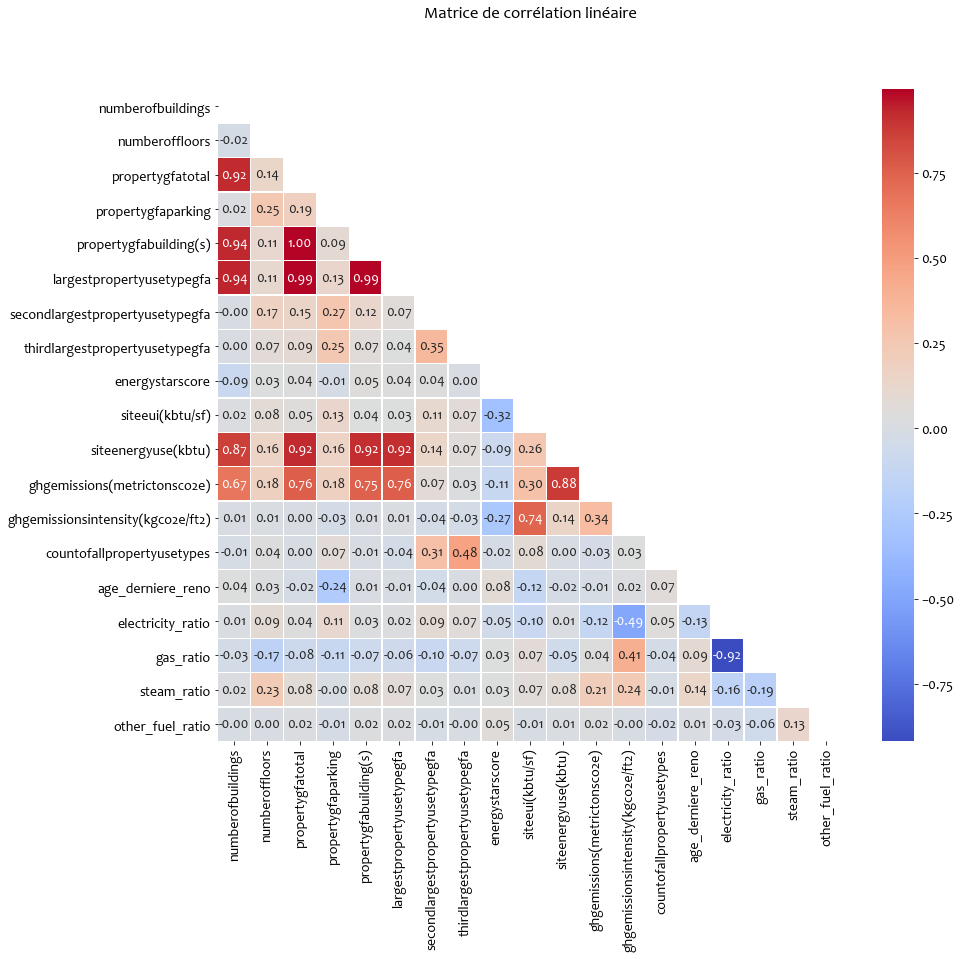

In [152]:
#https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/

corr = data_to_corr.corr()

#mask à mettre dans le plot pour triangulaire
mask = np.triu(np.ones_like(corr))

#heatmap
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig = plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, annot = True, fmt='.2f',mask = mask, linewidths=.5, cmap="coolwarm")
plt.title('Matrice de corrélation linéaire', y = 1.1);

# Variables à prédire

In [153]:
data[['siteenergyuse(kbtu)','ghgemissions(metrictonsco2e)']].describe()

,siteenergyuse(kbtu),ghgemissions(metrictonsco2e)
count,1.302000e+03,1302.000000
mean,6.444882e+06,137.853940
std,2.801827e+07,476.811288
min,1.697945e+04,-0.800000
25%,1.103017e+06,18.081250
50%,2.166226e+06,44.527500
75%,5.471428e+06,119.962500
max,8.739237e+08,11140.560000


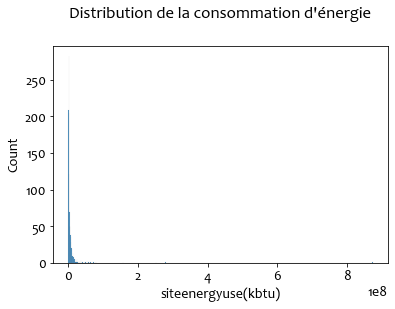

In [154]:
sns.histplot(data= data, x= 'siteenergyuse(kbtu)')
plt.title('Distribution de la consommation d\'énergie', y = 1.1);

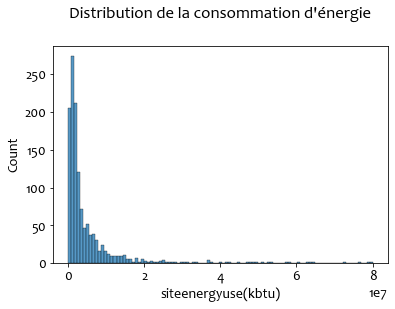

In [155]:
sns.histplot(data= data[data['siteenergyuse(kbtu)'] < 1e08], x= 'siteenergyuse(kbtu)')
plt.title('Distribution de la consommation d\'énergie', y=1.1);

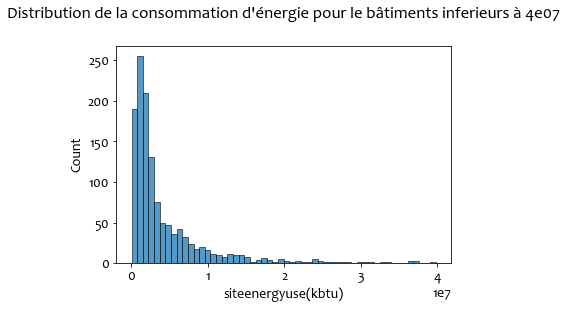

In [156]:
sns.histplot(data= data[data['siteenergyuse(kbtu)'] < 4e07], x= 'siteenergyuse(kbtu)')
plt.title('Distribution de la consommation d\'énergie pour le bâtiments inferieurs à 4e07', y=1.1);

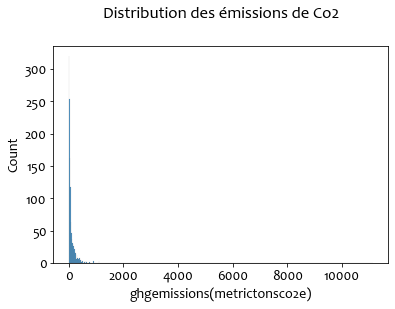

In [157]:
sns.histplot(data= data, x= 'ghgemissions(metrictonsco2e)')
plt.title('Distribution des émissions de Co2', y=1.1);

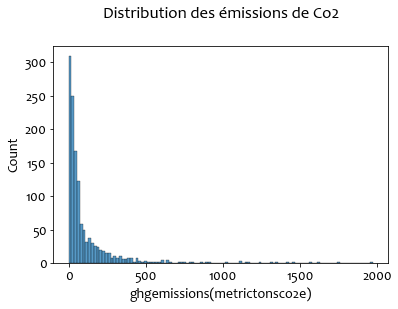

In [158]:
sns.histplot(data= data[data['ghgemissions(metrictonsco2e)'] < 2000], x= 'ghgemissions(metrictonsco2e)')
plt.title('Distribution des émissions de Co2', y=1.1);

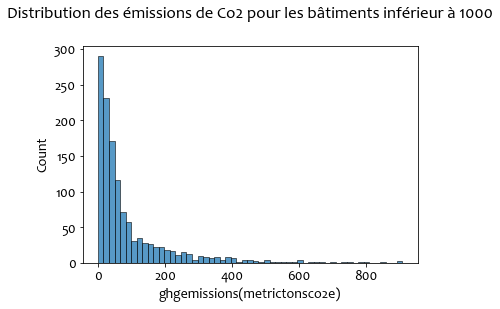

In [159]:
sns.histplot(data= data[data['ghgemissions(metrictonsco2e)'] < 1000], x= 'ghgemissions(metrictonsco2e)')
plt.title('Distribution des émissions de Co2 pour les bâtiments inférieur à 1000', y=1.1);

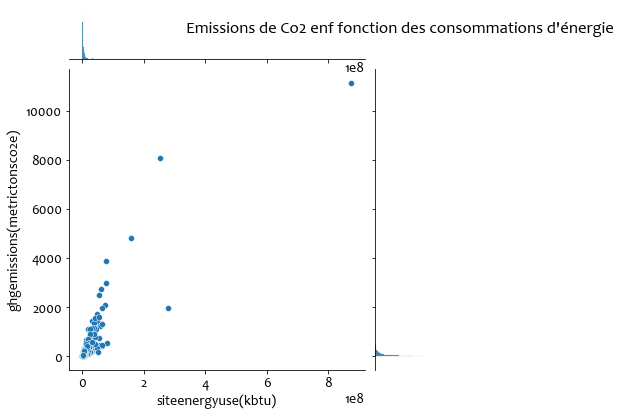

In [160]:
sns.jointplot(y=data['ghgemissions(metrictonsco2e)'], x=data['siteenergyuse(kbtu)'])
plt.title('Emissions de Co2 enf fonction des consommations d\'énergie', y=1.1);

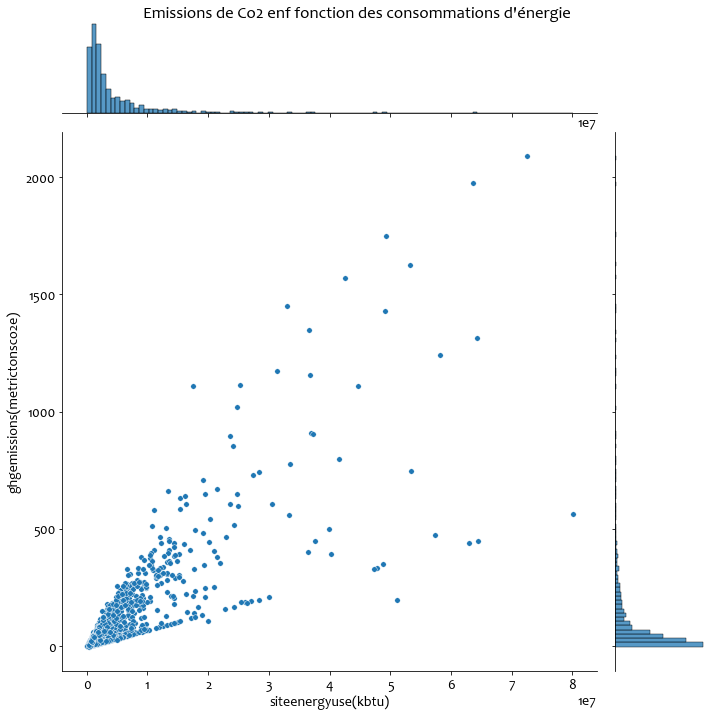

In [161]:
df = data[(data['ghgemissions(metrictonsco2e)'] <2500) & (data['siteenergyuse(kbtu)']<1e08)]

ax = sns.jointplot(y=df['ghgemissions(metrictonsco2e)'] , x=df['siteenergyuse(kbtu)'], s = 30, height = 10)

plt.title('Emissions de Co2 enf fonction des consommations d\'énergie', y=1.2, x =-2.8);

## Passage au log

In [162]:
data['energy_log'] = data['siteenergyuse(kbtu)'].apply(lambda x: np.log(1+x)) #1+x pour eviter log(0) et log(-0.8)
data['ghgemissions_log'] = data['ghgemissions(metrictonsco2e)'].apply(lambda x: np.log(1+x))

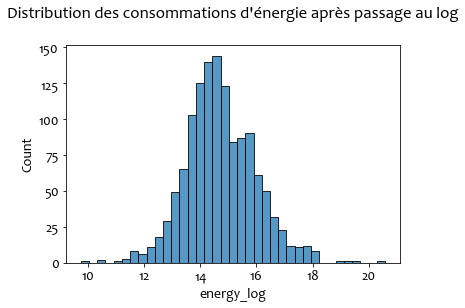

In [163]:
sns.histplot(data = data, x = 'energy_log')
plt.title('Distribution des consommations d\'énergie après passage au log', y=1.1);

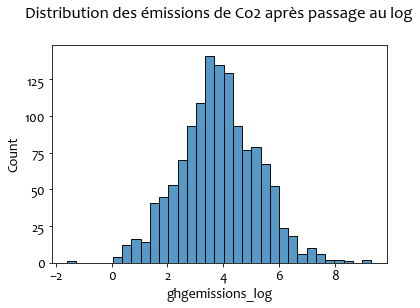

In [164]:
sns.histplot(data = data, x = 'ghgemissions_log')
plt.title('Distribution des émissions de Co2 après passage au log', y=1.1);

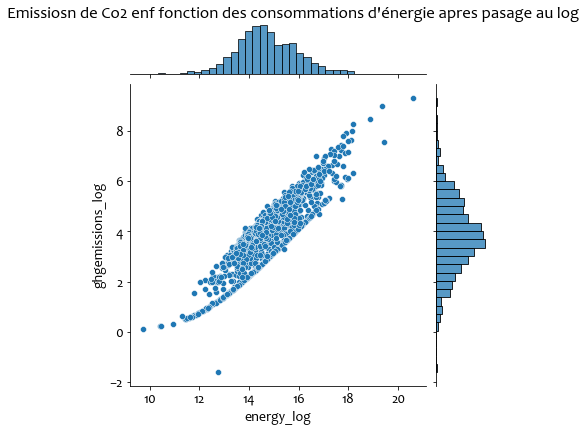

In [165]:
sns.jointplot(y=data.ghgemissions_log, x=data.energy_log)
plt.title('Emissiosn de Co2 enf fonction des consommations d\'énergie apres pasage au log', y=1.2, x =-2.8);

## Influence district

In [166]:
def boxplot_variable_consos(variable, pal = 'tab10'):

    fig = plt.figure(figsize = (25,12))
    
    for i,j in enumerate(['ghgemissions(metrictonsco2e)','siteenergyuse(kbtu)', 'energy_log', 'ghgemissions_log']):

        if j in ['ghgemissions(metrictonsco2e)','siteenergyuse(kbtu)']:
            showflier = False
        else :
            showflier = True
            
        fig.add_subplot(2,2,i+1)
        ax = sns.boxplot(data = data.sort_values(by = variable), x = variable, y=j, showfliers = showflier, palette = pal)
        plt.xlabel(ax.get_xlabel(), labelpad = 20)
        plt.ylabel(ax.get_ylabel(), labelpad = 20)
        
    fig.suptitle('Boxplots des consommations d\'énergie et émissions de co2 en fonction de '+variable, y = 0.95)
    fig.subplots_adjust(hspace = 0.3)
    
    pass

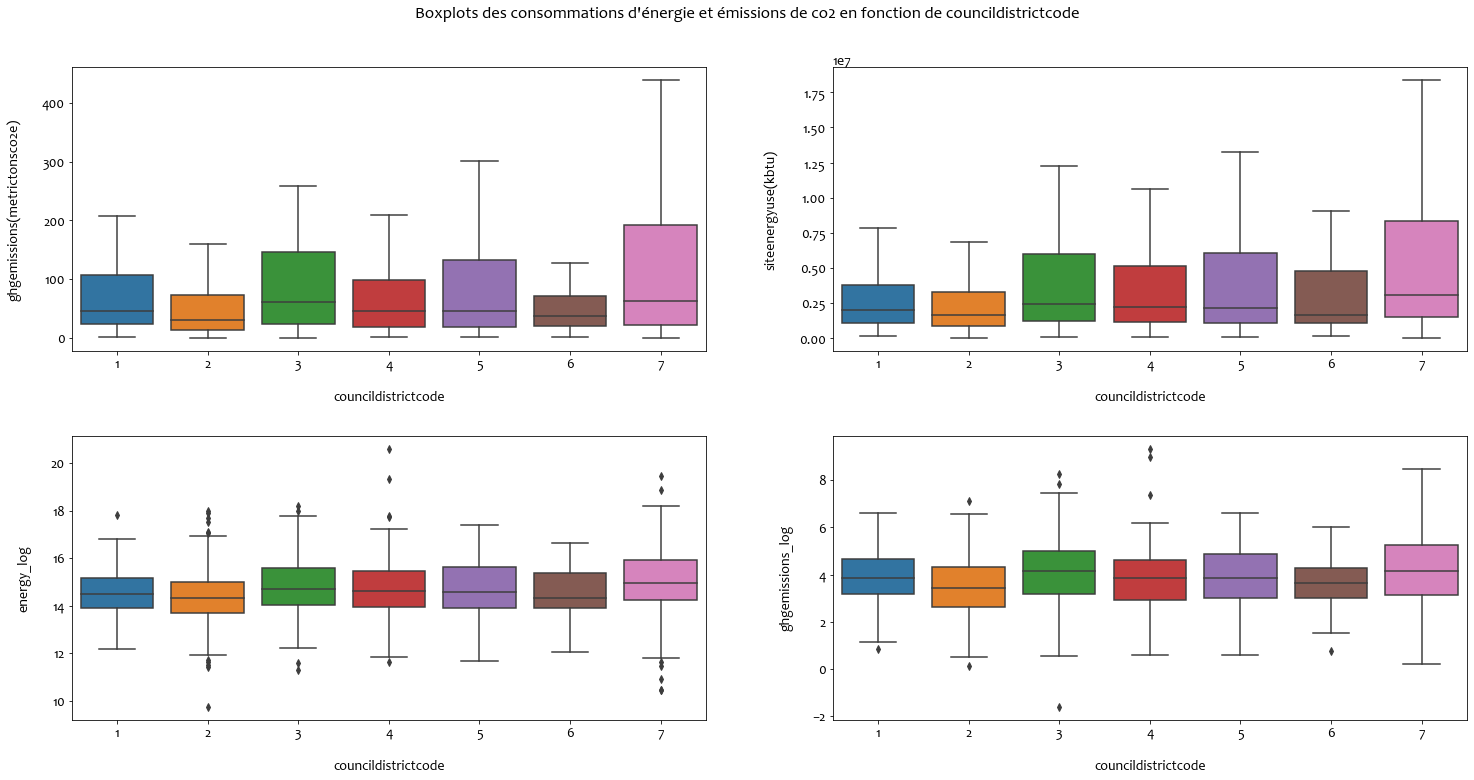

In [167]:
boxplot_variable_consos('councildistrictcode')

In [168]:
def scatter_conso_variablehue(variable, pal = 'tab10'):

    fig = plt.figure(figsize=(25,6))
    
    fig.add_subplot(1,2,1)
    
    df = data.sort_values(by=variable)
    
    df1 = df[(df['ghgemissions(metrictonsco2e)'] <2500) & (df['siteenergyuse(kbtu)']<1e08)]
    ax = sns.scatterplot(data = df1, y='ghgemissions(metrictonsco2e)' , x='siteenergyuse(kbtu)', s = 30, hue =variable, palette = pal)
    plt.title('Sans passage au log')
    plt.xlabel(ax.get_xlabel(), labelpad=20)
    plt.ylabel(ax.get_ylabel(), labelpad=20)
        
    fig.add_subplot(1,2,2)
    
    ax = sns.scatterplot(data = df, y = 'ghgemissions_log', x='energy_log', s = 30, hue =variable, palette = pal)
    plt.title('avec passage au log')
    plt.xlabel(ax.get_xlabel(), labelpad=20)
    plt.ylabel(ax.get_ylabel(), labelpad=20)
    
    fig.suptitle('Emissions de Co2 en fonction de la consommation d\'énergie')
    pass

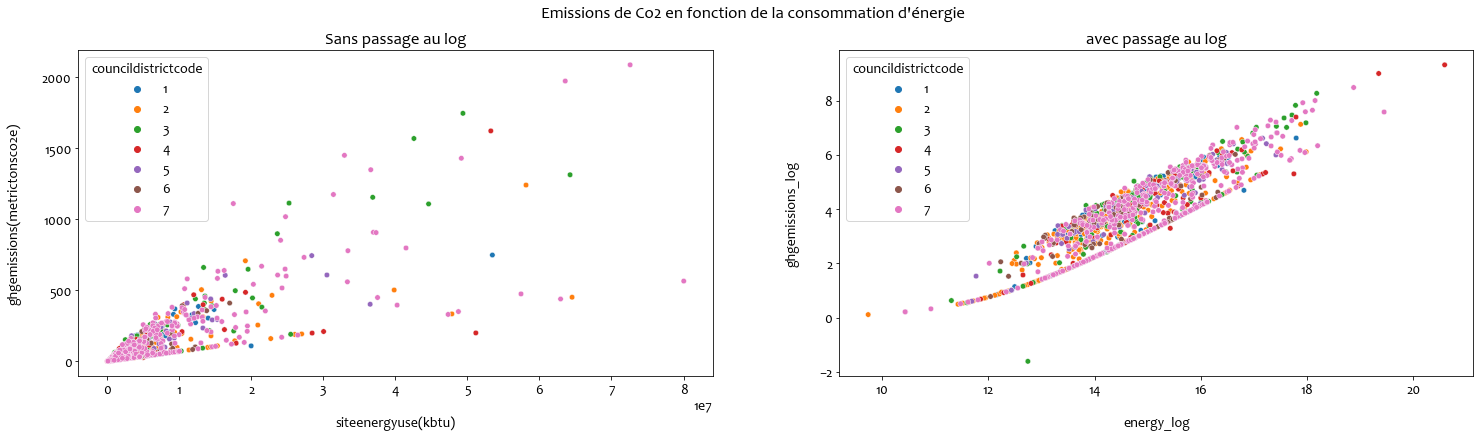

In [169]:
scatter_conso_variablehue('councildistrictcode')

## Influence buildingtype

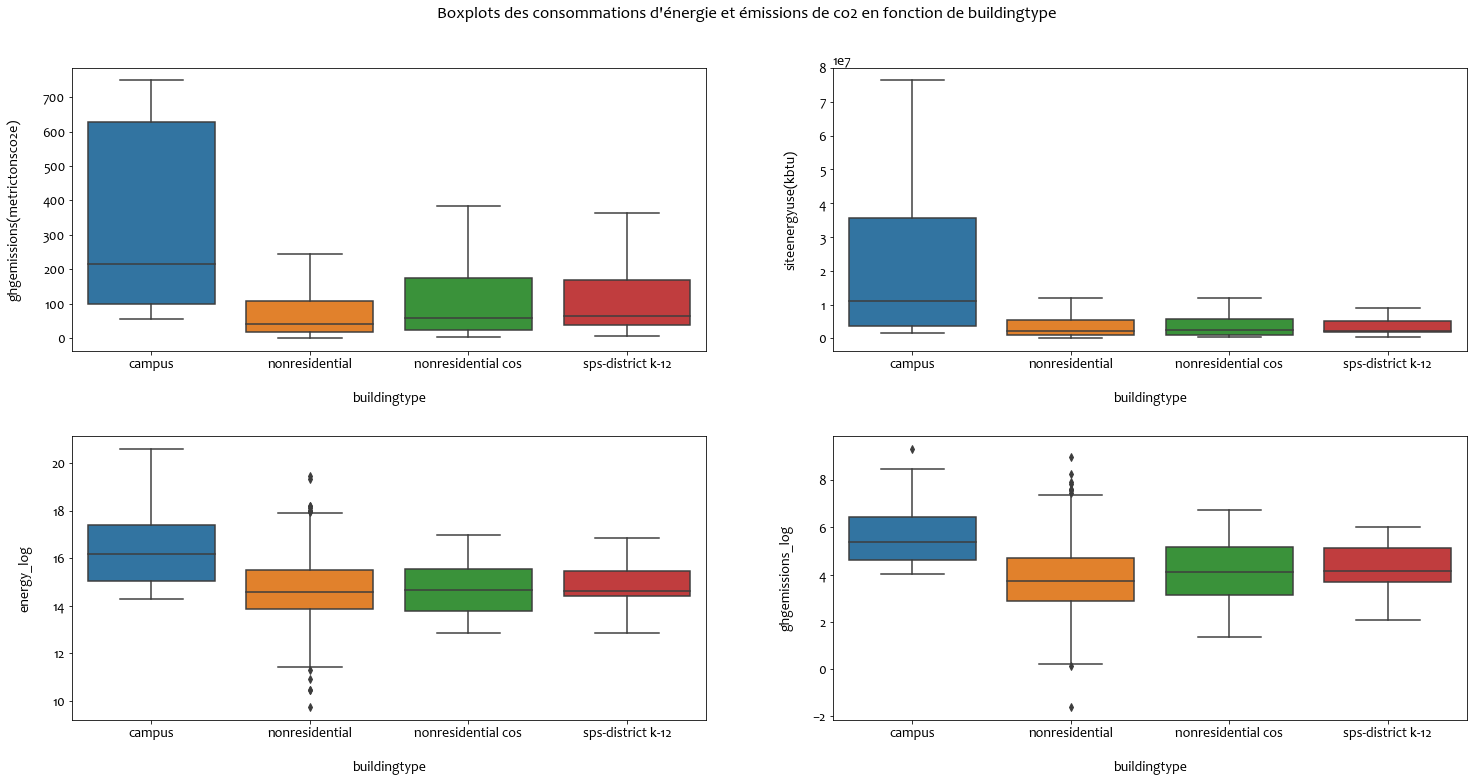

In [170]:
boxplot_variable_consos('buildingtype')

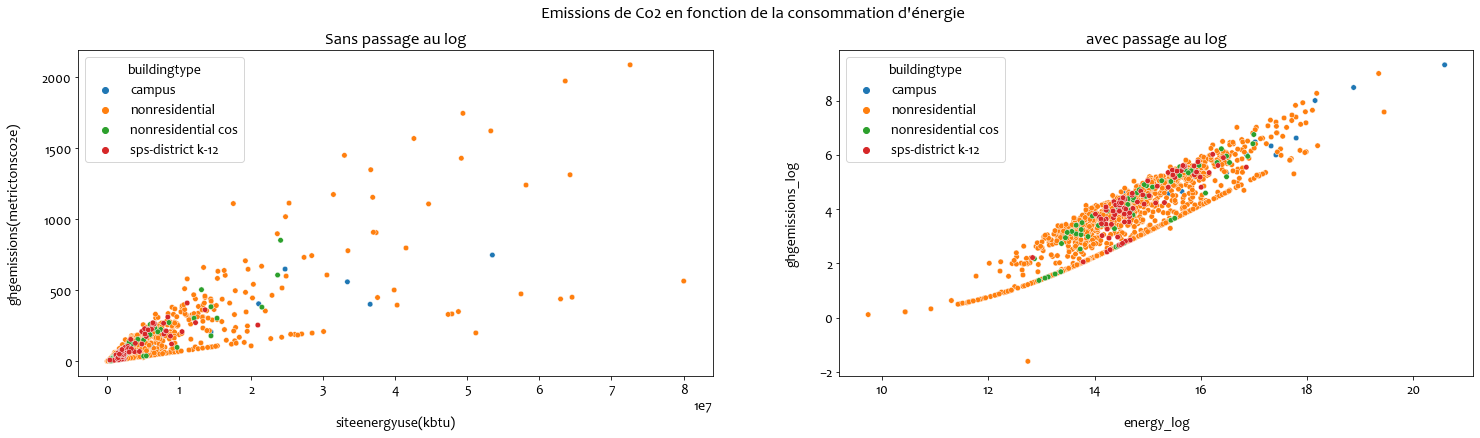

In [171]:
scatter_conso_variablehue('buildingtype')

In [172]:
data.buildingtype.value_counts()

nonresidential        1136
sps-district k-12       86
nonresidential cos      62
campus                  18
Name: buildingtype, dtype: int64

## Influence age

In [173]:
data.age_derniere_reno.value_counts()

116    40
106    28
37     26
90     25
16     25
       ..
72      2
81      1
80      1
77      1
1       1
Name: age_derniere_reno, Length: 113, dtype: int64

In [174]:
print(data.age_derniere_reno.min())
print(data.age_derniere_reno.max())

1
116


In [175]:
6< 5< 7

False

In [176]:
bins_age = [(i, i+9) for i in np.arange(1,120,10)]

In [177]:
def calcul_bin_age(x):
    
    for age in bins_age:
        
        age_min = age[0]
        age_max = age[1]
        
        if age_min <= x <= age_max:
            
            return age

In [178]:
data['bins_age'] = data.age_derniere_reno.apply(lambda x: calcul_bin_age(x))

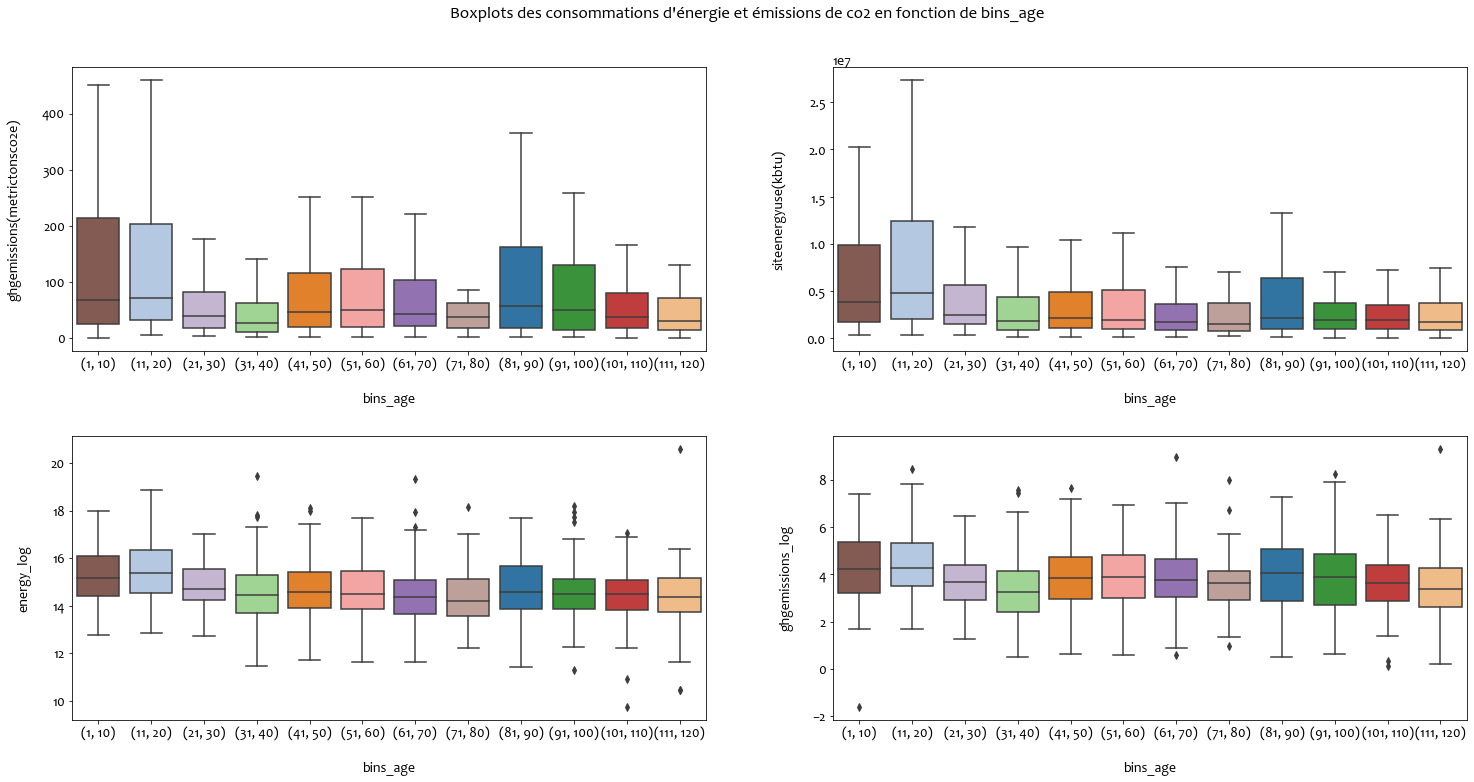

In [179]:
boxplot_variable_consos('bins_age', custom_palette(data,'bins_age'))

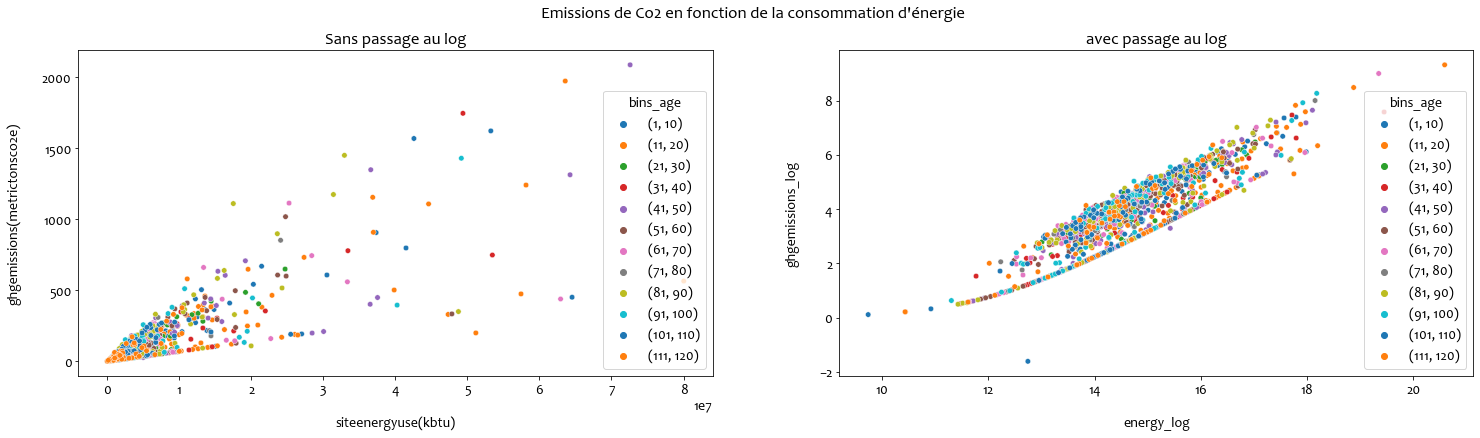

In [180]:
scatter_conso_variablehue('bins_age')

In [181]:
data.head()

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),sourceeui(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,outlier,seattle police department micro community policing plan areas,spd beats,zip codes,latitude,longitude,address,zipcode,countofallpropertyusetypes,age_derniere_reno,electricity_ratio,gas_ratio,steam_ratio,other_fuel_ratio,energy_log,ghgemissions_log,bins_age
0,1,2016,nonresidential,residential services,7,downtown,1927,1.0,12.0,88434.0,0.0,88434.0,hotel,residential services,88434.0,aucun,0.0,aucun,0.0,62.5,80.299998,178.000000,7103895.25,7277224.50,2.013457e+06,3816093.5,1274420.5,0.0,249.705,2.735,False,NaN,14.0,31.0,18081.0,47.6122,-122.33799,405 olive way,98101.0,1.0,89,50,20,30,0,15.776154,5.524277,"(81, 90)"
1,2,2016,nonresidential,residential services,7,downtown,1996,1.0,11.0,103566.0,15064.0,88502.0,"hotel, parking, restaurant",residential services,83880.0,other,15064.0,other,4622.0,56.0,94.600002,183.700003,8371084.00,8715133.50,0.000000e+00,3574131.0,4797033.5,0.0,279.685,2.620,False,NaN,14.0,31.0,18081.0,47.61317,-122.33393,724 pine street,98101.0,3.0,20,40,60,0,0,15.940294,5.637233,"(11, 20)"
2,3,2016,nonresidential,residential services,7,downtown,1969,1.0,41.0,956110.0,196718.0,759392.0,hotel,residential services,756493.0,aucun,0.0,aucun,0.0,43.0,96.000000,241.899994,72587024.00,73937112.00,2.156655e+07,49526664.0,1493800.0,0.0,2089.280,2.190,False,NaN,NaN,NaN,NaN,47.61393,-122.3381,1900 5th avenue,98101.0,1.0,47,70,0,30,0,18.100297,7.645053,"(41, 50)"
3,5,2016,nonresidential,residential services,7,downtown,1926,1.0,10.0,61320.0,0.0,61320.0,hotel,residential services,61320.0,aucun,0.0,aucun,0.0,28.5,285.600002,426.249998,17511952.00,17655122.25,1.283648e+07,2768973.5,1906553.5,0.0,1111.385,18.025,False,high outlier,56.0,31.0,18081.0,47.61412,-122.33664,620 stewart st,98101.0,1.0,90,20,10,70,0,16.678394,7.014262,"(81, 90)"
4,9,2016,nonresidential cos,other,7,downtown,1999,1.0,2.0,97288.0,37198.0,60090.0,police station,other,88830.0,aucun,0.0,aucun,0.0,NaN,135.900003,314.899994,12069300.00,12813485.00,0.000000e+00,7321219.0,4748232.5,0.0,303.215,2.955,False,NaN,56.0,7.0,19576.0,47.61623,-122.33657,810 virginia st,98101.0,1.0,17,60,40,0,0,16.306176,5.717735,"(11, 20)"


## Primary property type

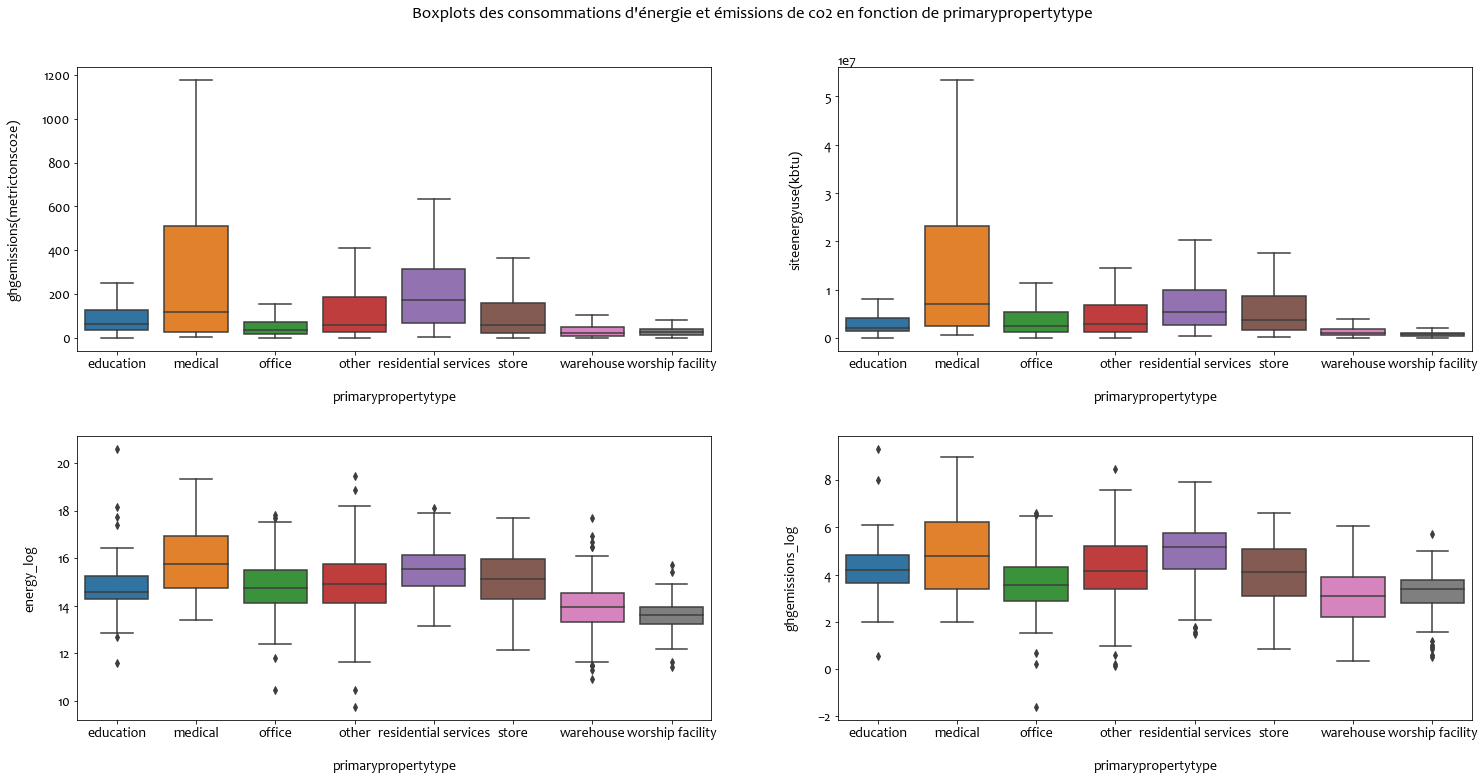

In [182]:
boxplot_variable_consos('primarypropertytype')

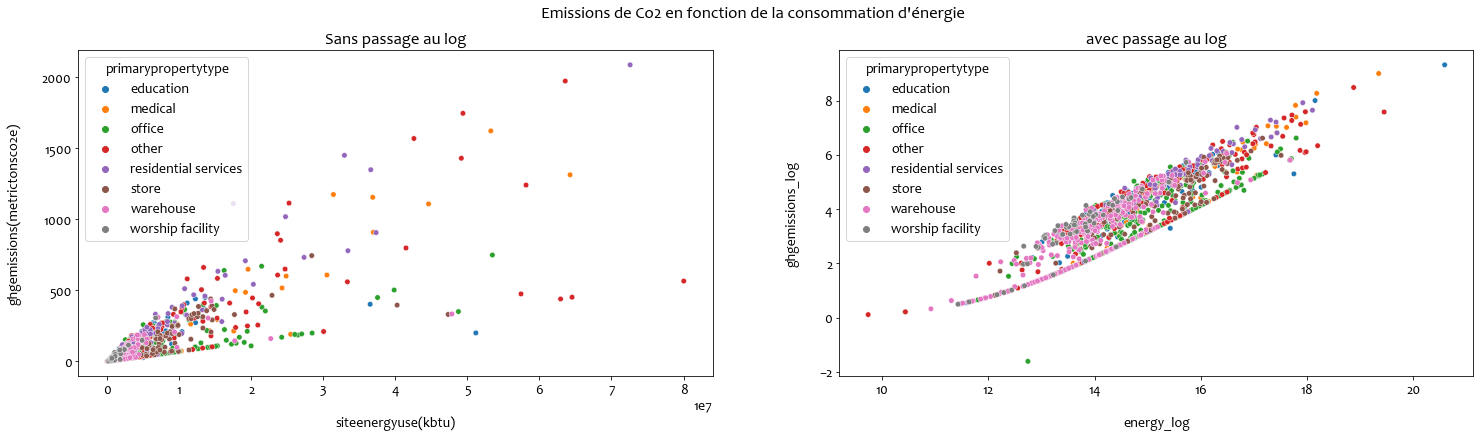

In [183]:
scatter_conso_variablehue('primarypropertytype')

In [184]:
def scatter_focus(variable, focus):
    
    fig = plt.figure(figsize=(25,6))
    
    fig.add_subplot(1,2,1)
    
    df = data[data[variable] == focus]
    
    df1 = df[(df['ghgemissions(metrictonsco2e)'] <2500) & (df['siteenergyuse(kbtu)']<1e08)]
    ax = sns.scatterplot(data = df1, y='ghgemissions(metrictonsco2e)' , x='siteenergyuse(kbtu)', s = 30)
        
    fig.add_subplot(1,2,2)
    
    ax = sns.scatterplot(data = df, y = 'ghgemissions_log', x='energy_log', s = 30)
    
    fig.suptitle(focus)
    pass

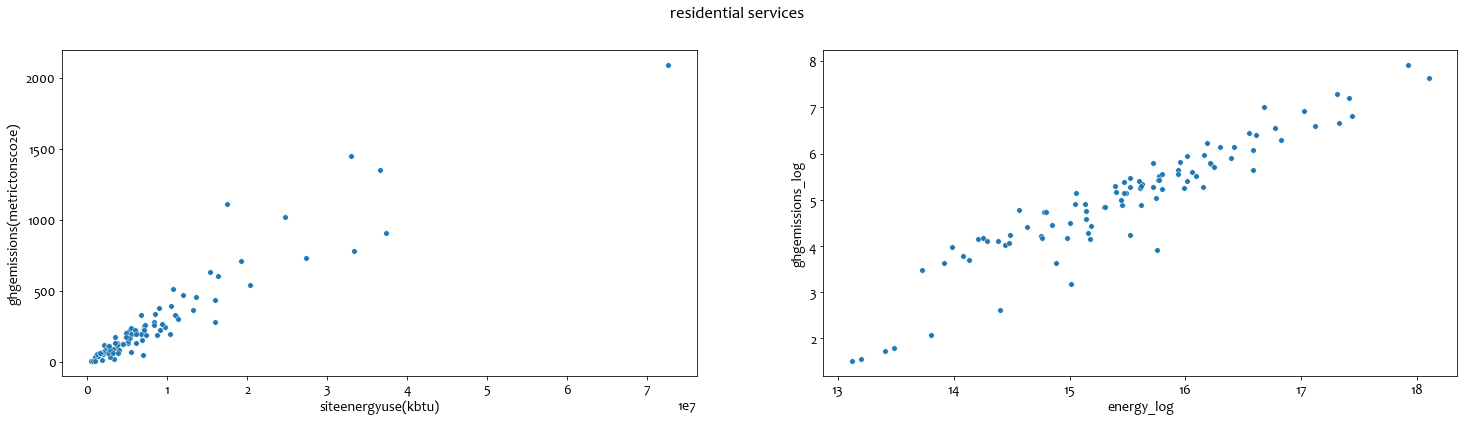

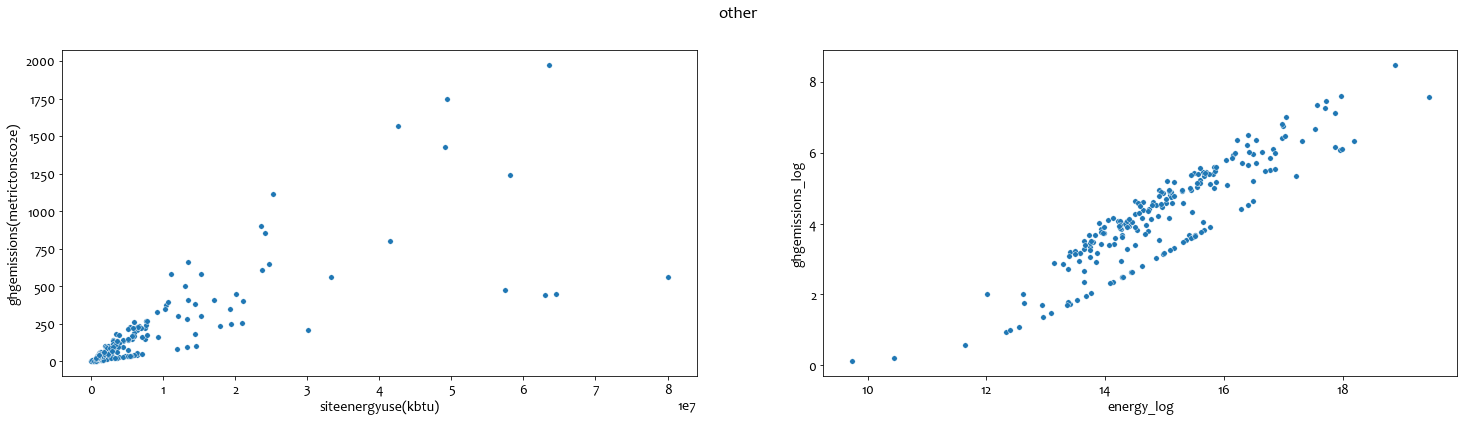

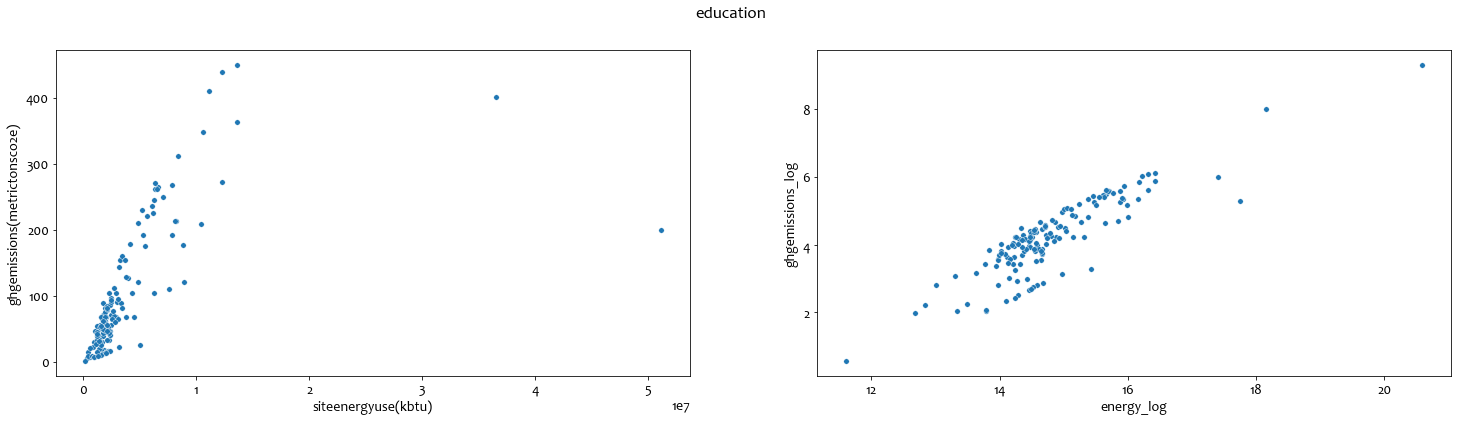

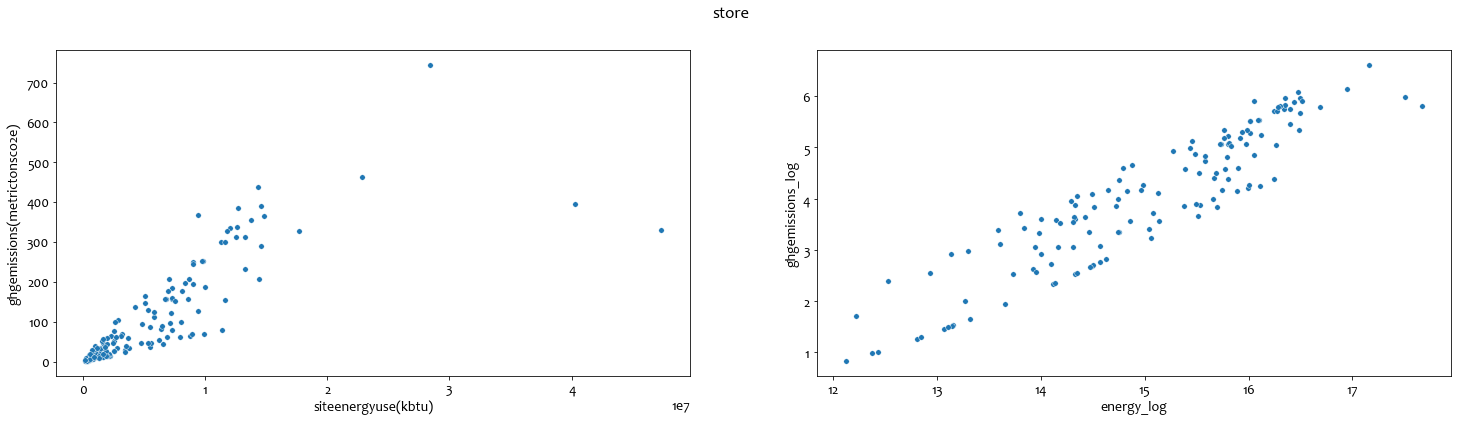

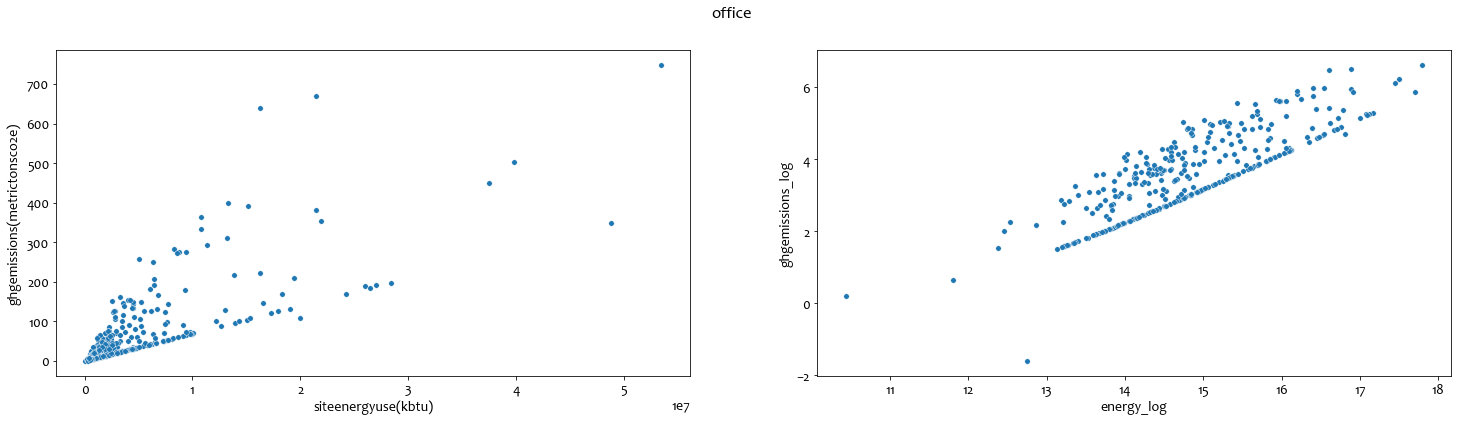

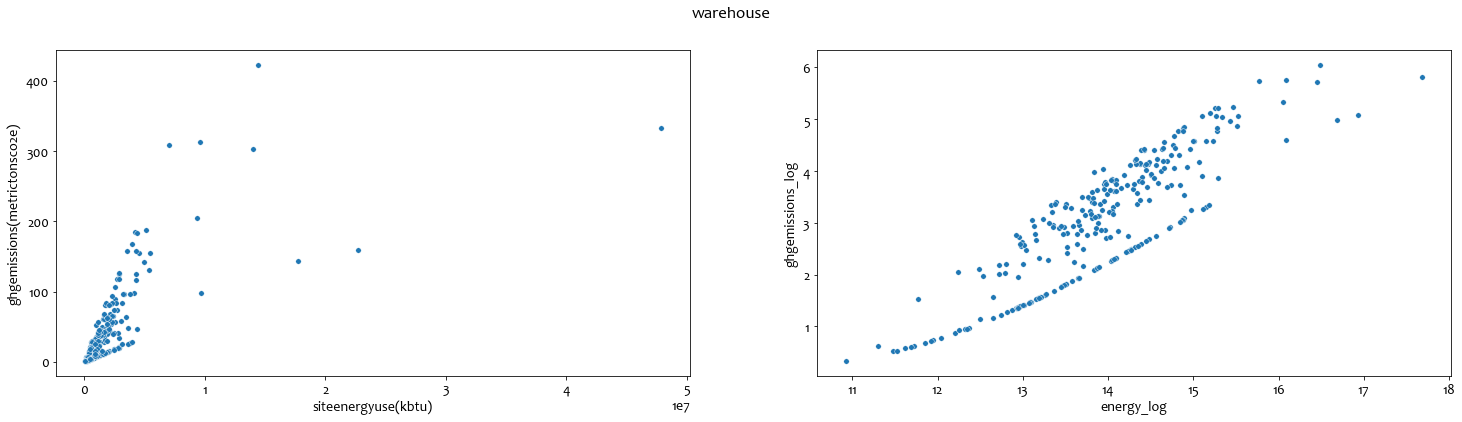

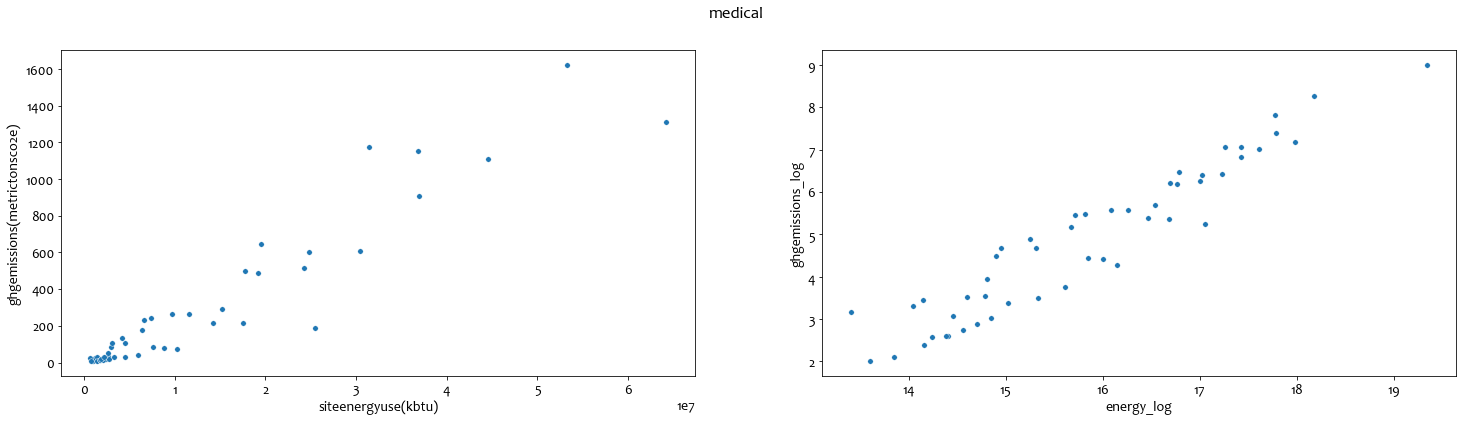

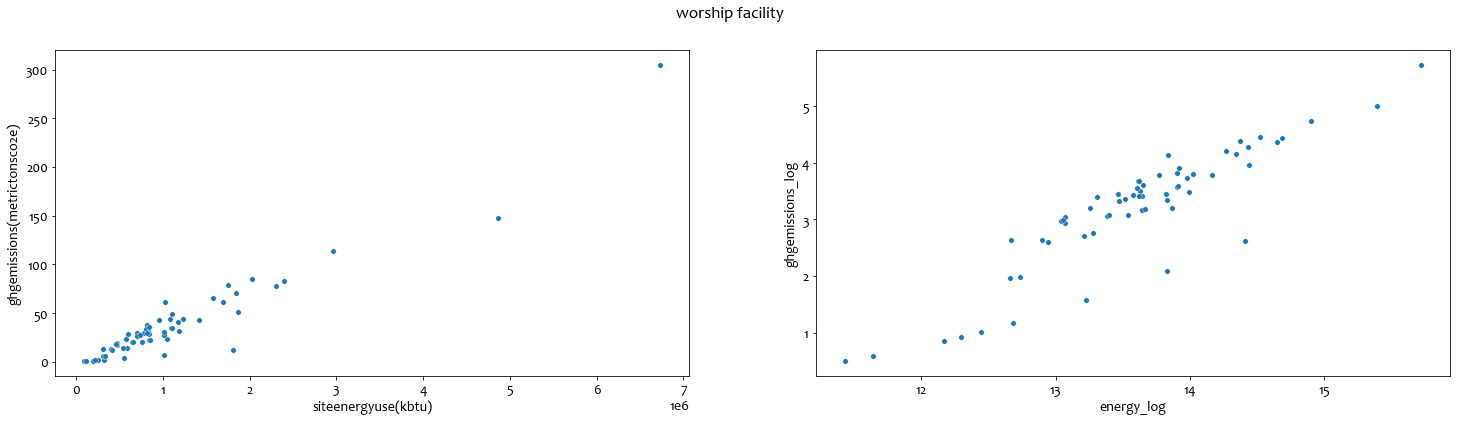

In [185]:
for usage in data.primarypropertytype.unique():
    
    scatter_focus('primarypropertytype', usage)

# Outliers

In [186]:
data.outlier.unique()

array([nan, 'high outlier', 'low outlier'], dtype=object)

In [ ]:
#on va essayer de voir si les outliers indiqués par le data set se démarquent

In [187]:
data.outlier.value_counts()

low outlier     19
high outlier    12
Name: outlier, dtype: int64

In [188]:
data['outlier'] = data.outlier.apply(lambda x: 'oui' if 'outlier' in str(x) else 'non')

In [189]:
data.outlier.value_counts()

non    1271
oui      31
Name: outlier, dtype: int64

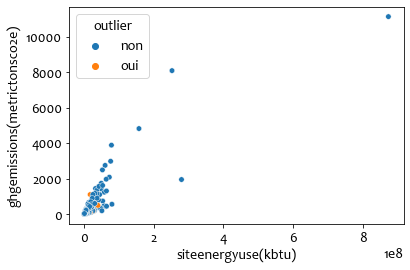

In [190]:
ax = sns.scatterplot(data = data, y = 'ghgemissions(metrictonsco2e)', x='siteenergyuse(kbtu)', s = 30, hue ='outlier')

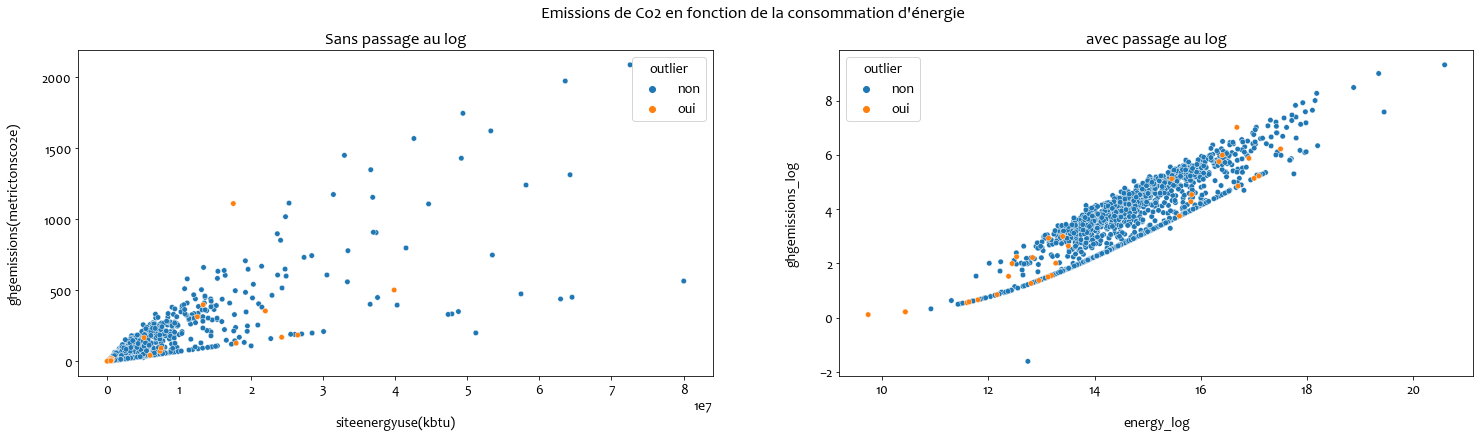

In [191]:
scatter_conso_variablehue('outlier')

In [ ]:
#a premiere vue non au niveau des ocnsos, ce sont peut etre de soutliers au niveau des surface ou par rapport à leur consos en focntion d'usafge, nb batiments, etc il faudrait pousser l'analyse pour en savoir plus.

In [192]:
data[data.outlier == 'oui']

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,energystarscore,siteeui(kbtu/sf),sourceeui(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),defaultdata,outlier,seattle police department micro community policing plan areas,spd beats,zip codes,latitude,longitude,address,zipcode,countofallpropertyusetypes,age_derniere_reno,electricity_ratio,gas_ratio,steam_ratio,other_fuel_ratio,energy_log,ghgemissions_log,bins_age
3,5,2016,nonresidential,residential services,7,downtown,1926,1.0,10.0,61320.0,0.0,61320.0,hotel,residential services,61320.0,aucun,0.0,aucun,0.0,28.5,285.600002,426.249998,1.751195e+07,1.765512e+07,1.283648e+07,2768973.5,1906553.5,0.0,1111.385,18.025,False,oui,56.0,31.0,18081.0,47.61412,-122.33664,620 stewart st,98101.0,1.0,90,20,10,70,0,16.678394,7.014262,"(81, 90)"
227,457,2016,nonresidential,office,4,lake union,2001,1.0,3.0,103697.0,47656.0,56041.0,office,office,63199.0,aucun,0.0,aucun,0.0,4.0,210.800003,442.949994,1.332231e+07,1.381132e+07,0.000000e+00,6700166.0,6622316.0,0.0,398.420,3.670,False,oui,61.0,3.0,18377.0,47.64776,-122.33924,1441 n 34th st,98103.0,1.0,15,50,50,0,0,16.404950,5.990013,"(11, 20)"
271,539,2016,nonresidential,store,4,northeast,1987,1.0,2.0,69492.0,0.0,69492.0,retail store,store,69800.0,aucun,0.0,aucun,0.0,100.0,5.250000,16.350000,3.637379e+05,3.637379e+05,0.000000e+00,363746.5,0.0,0.0,2.535,0.025,False,oui,60.0,38.0,18383.0,47.66178,-122.31812,4501 roosevelt way ne,98105.0,2.0,29,100,0,0,0,12.804192,1.262713,"(21, 30)"
357,696,2016,nonresidential,office,7,magnolia / queen anne,1978,1.0,1.0,105100.0,0.0,105100.0,office,office,105100.0,aucun,0.0,aucun,0.0,1.0,208.900003,569.150006,2.195518e+07,2.261917e+07,0.000000e+00,17592466.0,4363081.0,0.0,354.365,3.010,False,oui,50.0,39.0,19575.0,47.65692,-122.37059,1100 w ewing st,98119.0,1.0,38,80,20,0,0,16.904514,5.873145,"(31, 40)"
358,700,2016,nonresidential,store,7,magnolia / queen anne,2008,1.0,1.0,57176.0,0.0,57176.0,"personal services (health/beauty, dry cleaning...",store,39500.0,store,15000.0,other,5500.0,31.0,208.800003,456.600000,1.252517e+07,1.284386e+07,0.000000e+00,7061628.0,4976456.0,0.0,313.530,4.950,False,oui,33.0,27.0,19575.0,47.63718,-122.37734,2001 15th avenue west,98119.0,5.0,8,60,40,0,0,16.343251,5.751079,"(1, 10)"
361,703,2016,nonresidential,office,7,magnolia / queen anne,2000,1.0,4.0,165111.0,55000.0,110111.0,"data center, office, parking",office,104667.0,other,30222.0,other,5444.0,1.5,219.999997,690.749988,2.422162e+07,2.422162e+07,0.000000e+00,24222094.0,0.0,0.0,168.860,0.725,False,oui,50.0,40.0,19575.0,47.62302,-122.36476,501 elliot ave west,98119.0,3.0,16,100,0,0,0,17.002756,5.134975,"(11, 20)"
362,704,2016,nonresidential,office,7,magnolia / queen anne,2000,1.0,4.0,129551.0,42500.0,87051.0,"data center, office, parking",office,81470.5,other,42500.0,other,4778.0,1.0,306.600006,962.850012,2.645095e+07,2.622944e+07,0.000000e+00,26451485.5,0.0,0.0,184.400,0.995,False,oui,50.0,40.0,19575.0,47.62235,-122.36378,401 elliot ave west,98119.0,3.0,16,100,0,0,0,17.090803,5.222516,"(11, 20)"
449,1281,2016,nonresidential,office,4,northeast,1960,1.0,3.0,113944.0,48510.0,65434.0,office,office,65434.0,aucun,0.0,aucun,0.0,1.0,273.599994,857.650006,1.790230e+07,1.790093e+07,0.000000e+00,17858352.5,44318.0,0.0,126.845,0.775,False,oui,60.0,38.0,18383.0,47.66181,-122.31231,4545 15th ave ne,98105.0,1.0,56,100,0,0,0,16.700440,4.850819,"(51, 60)"
470,19656,2015,nonresidential,office,7,downtown,1929,1.0,3.0,21600.0,0.0,21600.0,office,office,21600.0,aucun,0.0,aucun,0.0,NaN,6.200000,19.50000

In [194]:
data_to_process = data[['buildingtype', 'primarypropertytype', 'councildistrictcode', 'numberofbuildings', 'numberoffloors', 'propertygfatotal', 'propertygfaparking', 'propertygfabuilding(s)',
                        'largestpropertyusetype', 'largestpropertyusetypegfa', 'secondlargestpropertyusetype', 'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetype',
                        'thirdlargestpropertyusetypegfa', 'energystarscore', 'siteenergyuse(kbtu)', 'ghgemissions(metrictonsco2e)', 'outlier', 'countofallpropertyusetypes', 'age_derniere_reno',
                        'electricity_ratio', 'gas_ratio', 'steam_ratio', 'other_fuel_ratio', 'energy_log', 'ghgemissions_log']]

In [195]:
data_to_process.to_csv('Data/data_to_process.csv', index = False)